# Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow.keras import layers, models
from keras import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


from VGG16_models import preprocess_grayscale_to_rgb, VGG_model, VGG_imagenet, MobileNet_imagenet, data_generator, evaluate_validation_set, evaluate_test_set, prepare_train_val_data
from plots import plot_confusion_matrix, plot_training_history, plot_training_history2


path_dir = os.getcwd()
np.random.seed(123)
tf.random.set_seed(123)

2024-04-18 11:04:10.037622: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 11:04:16.868834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Pre-trained VGG16- 2 classes 


In [2]:
dataset_dir = f'{path_dir}/DataDDPM/Original'
class_labels = ['NORMAL', 'PNEUMONIA']


In [4]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have a function to load your entire dataset:
X, y = prepare_train_val_data(dataset_dir, class_labels)  # This function should return the entire dataset and labels

# Initialize KFold
kf = KFold(n_splits=12, shuffle=True, random_state=42)

# Loop over each fold
fold = 0
for train_index, val_index in kf.split(X):
    # Splitting the dataset into the training and validation set
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Assuming you have a function to convert arrays to data generators
    train_gen, val_gen = data_to_generator(X_train, y_train, X_val, y_val, batch_size)

    steps_per_epoch = len(X_train) // batch_size
    validation_steps = len(X_val) // batch_size

    # Define the model
    model_2class = VGG_imagenet((224, 224, 3), num_classes=2)

    # Train the model
    history_2class = model_2class.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_gen,
        validation_steps=validation_steps,
        epochs=4
    )

    # Plot Accuracy and Loss
    title = "Original Data"
    model_name = f"VGG16_Fold_{fold}"
    plot_training_history(history_2class, title, model_name, figsize=(14, 5))

    # Evaluate on different test sets
    for data_dir, data_title in [(f'{path_dir}/DataDDPM/Generated', 'DDPM set'), (f'{path_dir}/DataGANS/Generated', 'GANs set')]:
        title = f"VGG16_{fold} Train: Original \n Test: {data_title}"
        evaluate_test_set(data_dir, model_2class, batch_size, data_generator, plot_confusion_matrix, class_labels, title)

    fold += 1


ValueError: too many values to unpack (expected 2)

2024-04-16 18:52:47.376960: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 973ms/step - accuracy: 0.5632 - loss: 7.0217 - val_accuracy: 0.4844 - val_loss: 2.6579
Epoch 2/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 878ms/step - accuracy: 0.6888 - loss: 1.1628 - val_accuracy: 0.9375 - val_loss: 0.2148
Epoch 3/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 874ms/step - accuracy: 0.9424 - loss: 0.1718 - val_accuracy: 0.9167 - val_loss: 0.1897
Epoch 4/4
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 912ms/step - accuracy: 0.9689 - loss: 0.1078 - val_accuracy: 0.9531 - val_loss: 0.2408


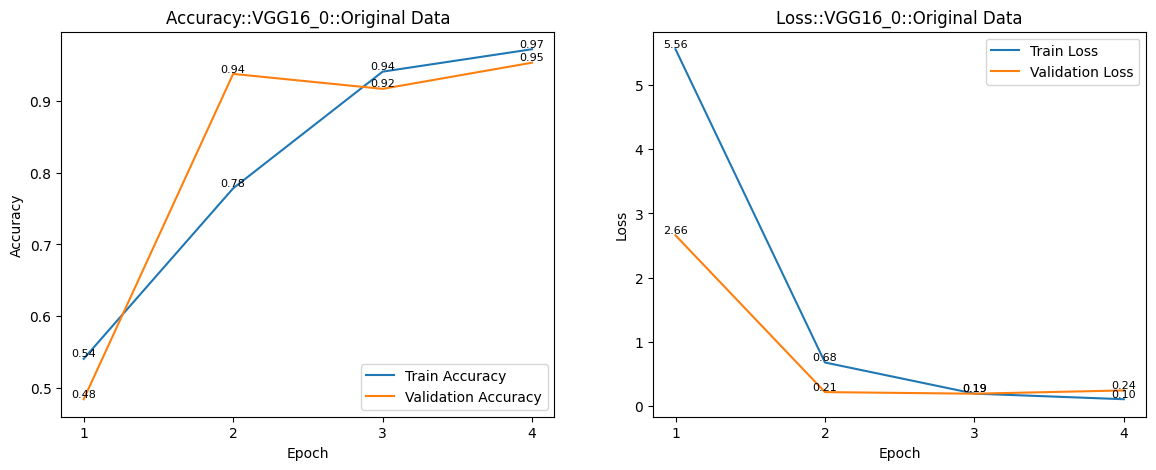

Confusion matrix, without normalization
[[114  86]
 [  0 200]]


<Figure size 640x480 with 0 Axes>

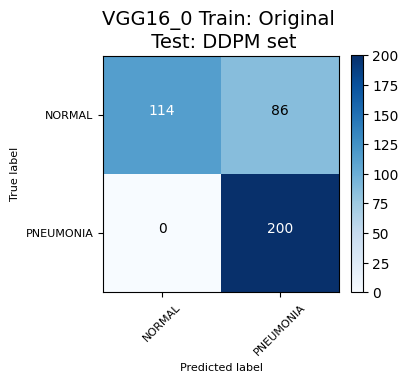

              precision    recall  f1-score   support

      NORMAL       1.00      0.57      0.73       200
   PNEUMONIA       0.70      1.00      0.82       200

    accuracy                           0.79       400
   macro avg       0.85      0.78      0.77       400
weighted avg       0.85      0.79      0.77       400

Binary Classification:
Accuracy: 0.785
Recall: 1.0
F1 Score: 0.823045267489712
Confusion matrix, without normalization
[[  5  95]
 [  0 100]]


<Figure size 640x480 with 0 Axes>

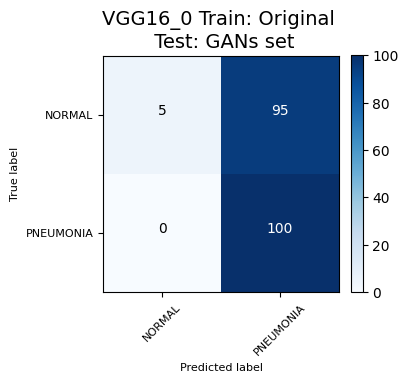

              precision    recall  f1-score   support

      NORMAL       1.00      0.05      0.10       100
   PNEUMONIA       0.51      1.00      0.68       100

    accuracy                           0.53       200
   macro avg       0.76      0.53      0.39       200
weighted avg       0.76      0.53      0.39       200

Binary Classification:
Accuracy: 0.525
Recall: 1.0
F1 Score: 0.6779661016949152
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4844 - loss: 10.8446 - val_accuracy: 0.5625 - val_loss: 3.1070
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 815ms/step - accuracy: 0.6575 - loss: 1.9874 - val_accuracy: 1.0000 - val_loss: 0.0569
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 941ms/step - accuracy: 0.8137 - loss: 0.6301 - val_accuracy: 0.8125 - val_loss: 0.4625
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 809ms/step - accuracy: 0.9313 - loss: 0.1432 - val_accuracy: 1.0000 - val_loss: 0.0670


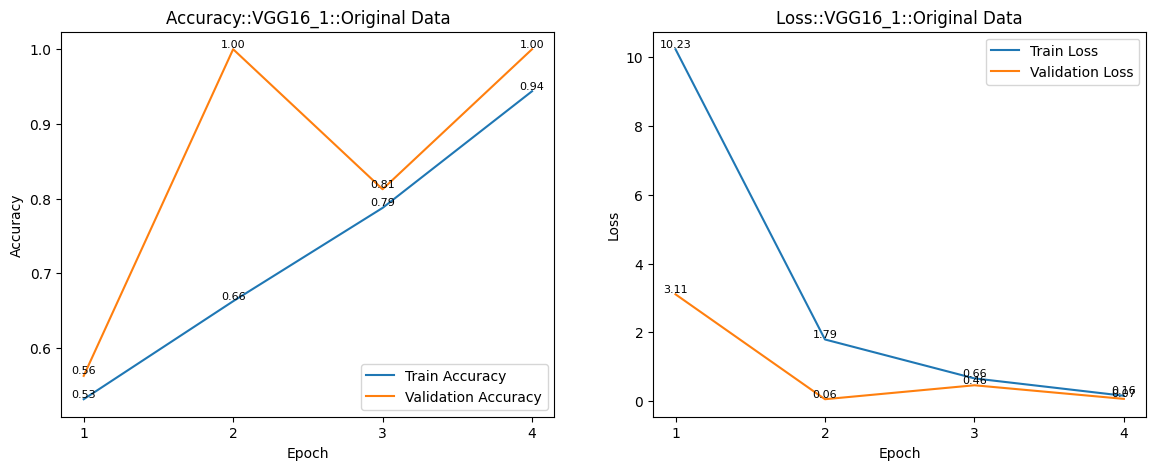

Confusion matrix, without normalization
[[196   4]
 [ 30 170]]


<Figure size 640x480 with 0 Axes>

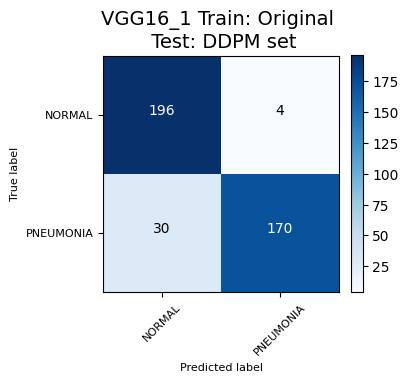

              precision    recall  f1-score   support

      NORMAL       0.87      0.98      0.92       200
   PNEUMONIA       0.98      0.85      0.91       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.92      0.92      0.91       400

Binary Classification:
Accuracy: 0.915
Recall: 0.85
F1 Score: 0.9090909090909091
Confusion matrix, without normalization
[[100   0]
 [ 20  80]]


<Figure size 640x480 with 0 Axes>

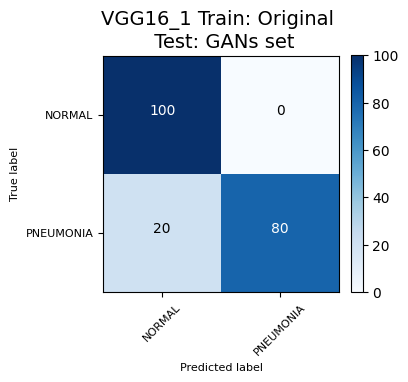

              precision    recall  f1-score   support

      NORMAL       0.83      1.00      0.91       100
   PNEUMONIA       1.00      0.80      0.89       100

    accuracy                           0.90       200
   macro avg       0.92      0.90      0.90       200
weighted avg       0.92      0.90      0.90       200

Binary Classification:
Accuracy: 0.9
Recall: 0.8
F1 Score: 0.8888888888888888
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4539 - loss: 12.7053 - val_accuracy: 0.5625 - val_loss: 4.1302
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.5077 - loss: 3.5054 - val_accuracy: 0.2500 - val_loss: 1.8853
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 948ms/step - accuracy: 0.6299 - loss: 1.2945 - val_accuracy: 0.8125 - val_loss: 0.4647
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 826ms/step - accuracy: 0.7734 - loss: 0.4373 - val_accuracy: 0.8750 - val_loss: 0.0990


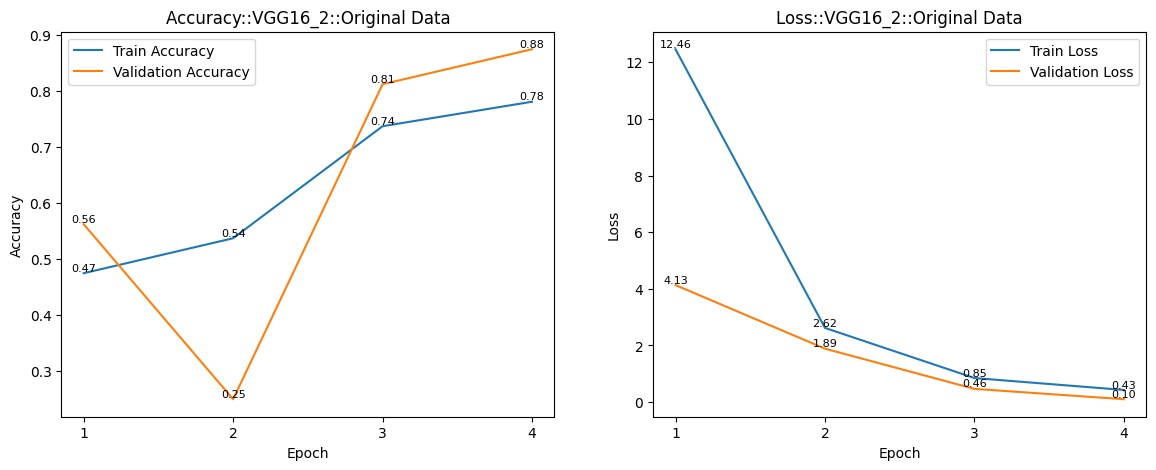

Confusion matrix, without normalization
[[152  48]
 [  2 198]]


<Figure size 640x480 with 0 Axes>

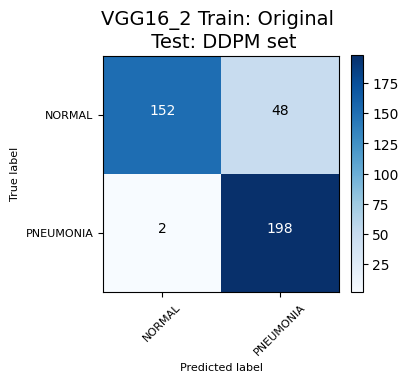

              precision    recall  f1-score   support

      NORMAL       0.99      0.76      0.86       200
   PNEUMONIA       0.80      0.99      0.89       200

    accuracy                           0.88       400
   macro avg       0.90      0.88      0.87       400
weighted avg       0.90      0.88      0.87       400

Binary Classification:
Accuracy: 0.875
Recall: 0.99
F1 Score: 0.8878923766816144
Confusion matrix, without normalization
[[94  6]
 [ 5 95]]


<Figure size 640x480 with 0 Axes>

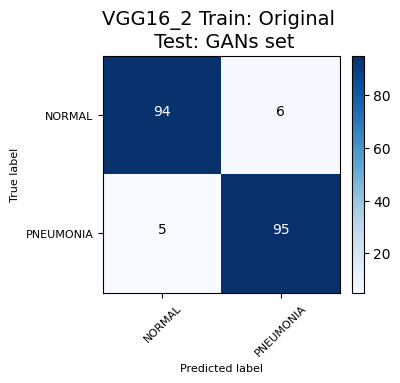

              precision    recall  f1-score   support

      NORMAL       0.95      0.94      0.94       100
   PNEUMONIA       0.94      0.95      0.95       100

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

Binary Classification:
Accuracy: 0.945
Recall: 0.95
F1 Score: 0.945273631840796
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4702 - loss: 9.8739 - val_accuracy: 0.8438 - val_loss: 0.4590
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.8156 - loss: 0.7154 - val_accuracy: 1.0000 - val_loss: 0.0687
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 943ms/step - accuracy: 0.8352 - loss: 0.4427 - val_accuracy: 0.9062 - val_loss: 0.3080
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 818ms/step - accuracy: 0.9409 - loss: 0.1833 - val_accuracy: 1.0000 - val_loss: 0.0217


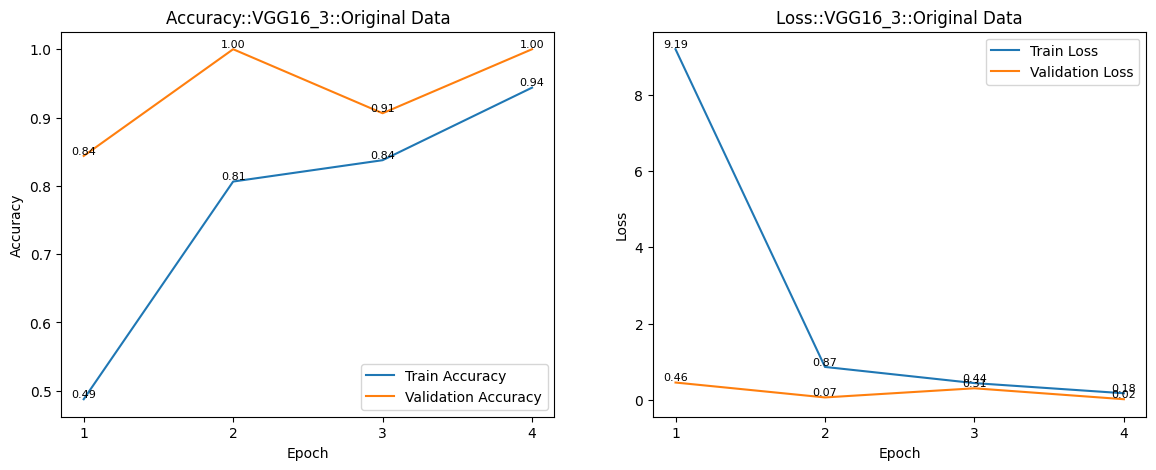

Confusion matrix, without normalization
[[188  12]
 [ 10 190]]


<Figure size 640x480 with 0 Axes>

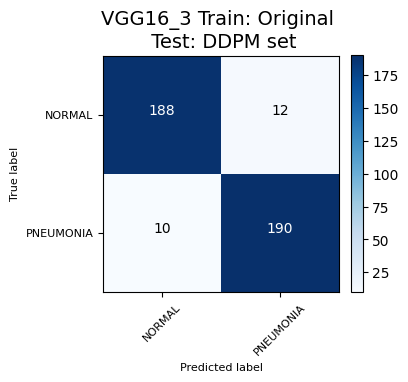

              precision    recall  f1-score   support

      NORMAL       0.95      0.94      0.94       200
   PNEUMONIA       0.94      0.95      0.95       200

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400

Binary Classification:
Accuracy: 0.945
Recall: 0.95
F1 Score: 0.945273631840796
Confusion matrix, without normalization
[[100   0]
 [ 11  89]]


<Figure size 640x480 with 0 Axes>

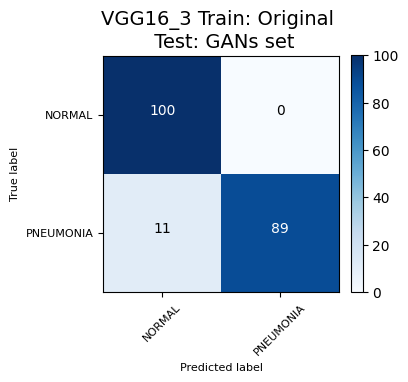

              precision    recall  f1-score   support

      NORMAL       0.90      1.00      0.95       100
   PNEUMONIA       1.00      0.89      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200

Binary Classification:
Accuracy: 0.945
Recall: 0.89
F1 Score: 0.9417989417989417
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4742 - loss: 11.3284 - val_accuracy: 0.5625 - val_loss: 6.9579
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 816ms/step - accuracy: 0.5056 - loss: 6.0038 - val_accuracy: 0.2500 - val_loss: 3.4619
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - accuracy: 0.5958 - loss: 2.0403 - val_accuracy: 0.7500 - val_loss: 0.5971
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 805ms/step - accuracy: 0.6998 - loss: 0.6794 - val_accuracy: 1.0000 - val_loss: 0.0559


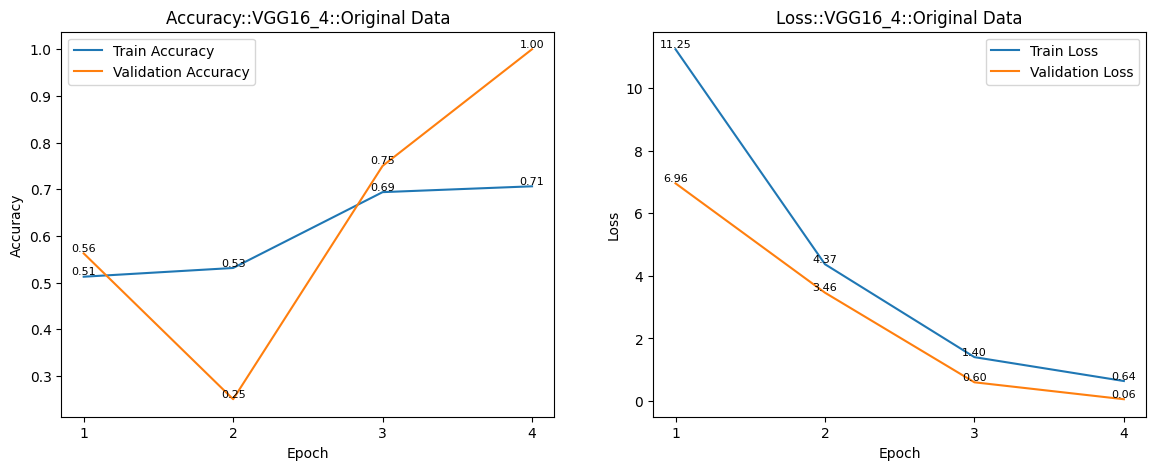

Confusion matrix, without normalization
[[176  24]
 [  4 196]]


<Figure size 640x480 with 0 Axes>

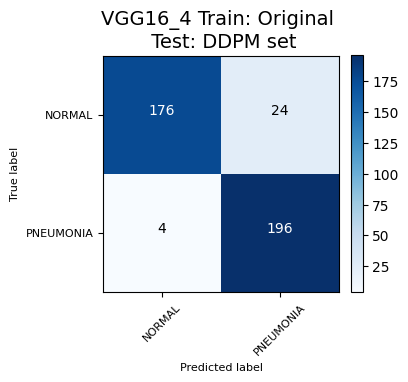

              precision    recall  f1-score   support

      NORMAL       0.98      0.88      0.93       200
   PNEUMONIA       0.89      0.98      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Binary Classification:
Accuracy: 0.93
Recall: 0.98
F1 Score: 0.9333333333333333
Confusion matrix, without normalization
[[96  4]
 [10 90]]


<Figure size 640x480 with 0 Axes>

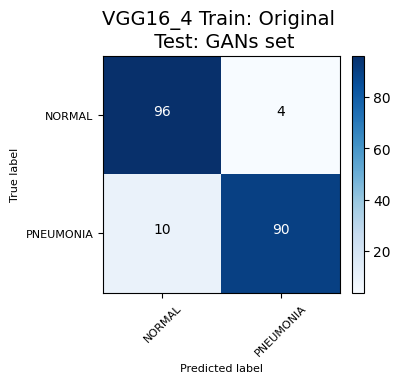

              precision    recall  f1-score   support

      NORMAL       0.91      0.96      0.93       100
   PNEUMONIA       0.96      0.90      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Binary Classification:
Accuracy: 0.93
Recall: 0.9
F1 Score: 0.9278350515463918
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4410 - loss: 10.0286 - val_accuracy: 0.5625 - val_loss: 3.8181
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 807ms/step - accuracy: 0.6128 - loss: 2.6393 - val_accuracy: 0.8750 - val_loss: 0.3406
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 938ms/step - accuracy: 0.8346 - loss: 0.7544 - val_accuracy: 0.7500 - val_loss: 0.8636
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 812ms/step - accuracy: 0.8771 - loss: 0.2830 - val_accuracy: 1.0000 - val_loss: 0.0713


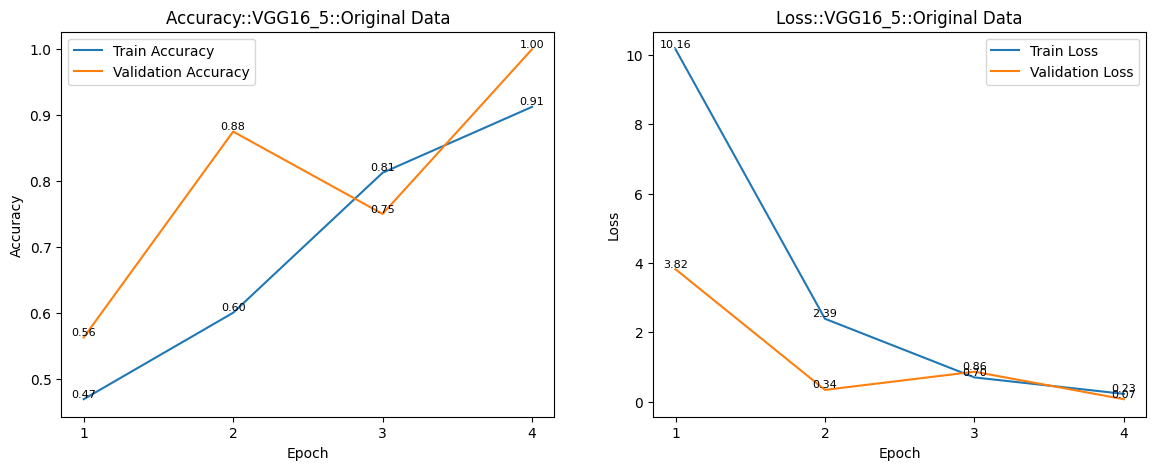

Confusion matrix, without normalization
[[196   4]
 [ 27 173]]


<Figure size 640x480 with 0 Axes>

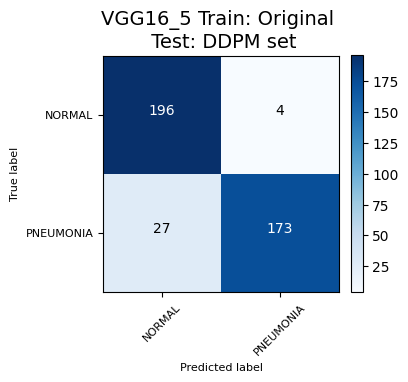

              precision    recall  f1-score   support

      NORMAL       0.88      0.98      0.93       200
   PNEUMONIA       0.98      0.86      0.92       200

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

Binary Classification:
Accuracy: 0.9225
Recall: 0.865
F1 Score: 0.9177718832891246
Confusion matrix, without normalization
[[100   0]
 [ 19  81]]


<Figure size 640x480 with 0 Axes>

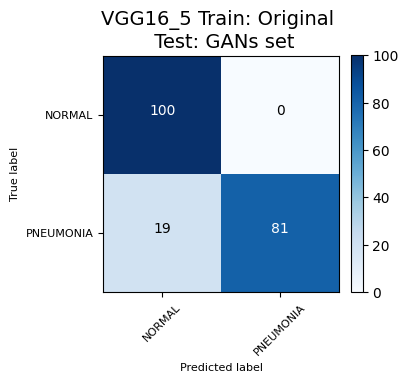

              precision    recall  f1-score   support

      NORMAL       0.84      1.00      0.91       100
   PNEUMONIA       1.00      0.81      0.90       100

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.90       200
weighted avg       0.92      0.91      0.90       200

Binary Classification:
Accuracy: 0.905
Recall: 0.81
F1 Score: 0.8950276243093923
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4668 - loss: 9.9856 - val_accuracy: 0.5938 - val_loss: 1.2483
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 813ms/step - accuracy: 0.6945 - loss: 1.2635 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 937ms/step - accuracy: 0.8074 - loss: 0.4417 - val_accuracy: 0.8750 - val_loss: 0.2760
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 812ms/step - accuracy: 0.9538 - loss: 0.1383 - val_accuracy: 1.0000 - val_loss: 0.0331


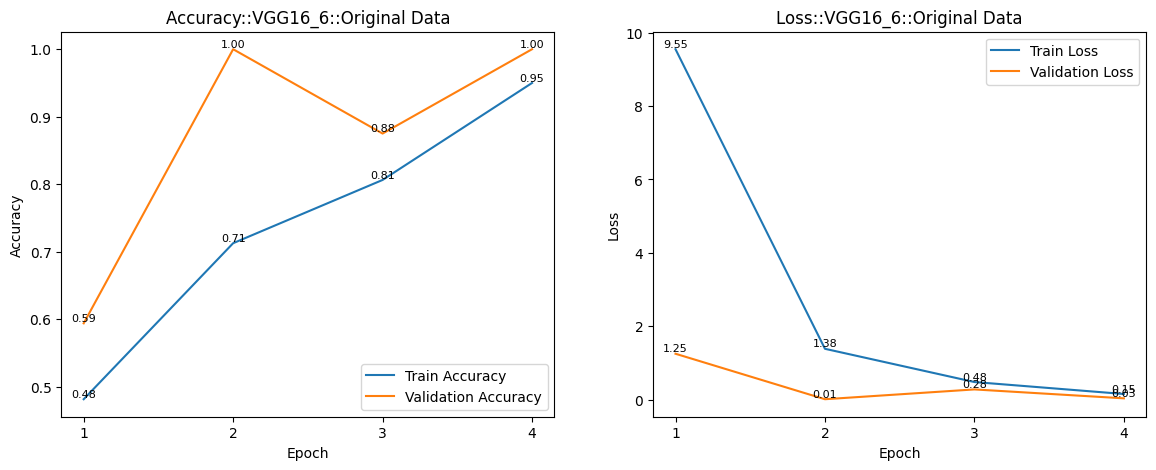

Confusion matrix, without normalization
[[194   6]
 [ 20 180]]


<Figure size 640x480 with 0 Axes>

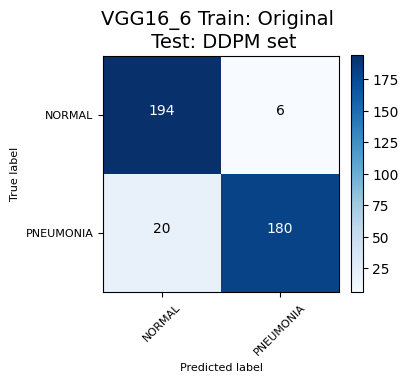

              precision    recall  f1-score   support

      NORMAL       0.91      0.97      0.94       200
   PNEUMONIA       0.97      0.90      0.93       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400

Binary Classification:
Accuracy: 0.935
Recall: 0.9
F1 Score: 0.9326424870466321
Confusion matrix, without normalization
[[100   0]
 [ 14  86]]


<Figure size 640x480 with 0 Axes>

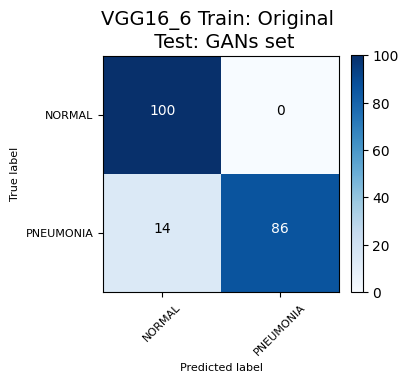

              precision    recall  f1-score   support

      NORMAL       0.88      1.00      0.93       100
   PNEUMONIA       1.00      0.86      0.92       100

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

Binary Classification:
Accuracy: 0.93
Recall: 0.86
F1 Score: 0.9247311827956989
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4539 - loss: 12.4161 - val_accuracy: 0.5625 - val_loss: 4.0876
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 810ms/step - accuracy: 0.4731 - loss: 4.0459 - val_accuracy: 0.2500 - val_loss: 0.8602
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 949ms/step - accuracy: 0.5209 - loss: 0.9769 - val_accuracy: 0.3750 - val_loss: 1.0312
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 808ms/step - accuracy: 0.6827 - loss: 0.6432 - val_accuracy: 0.7500 - val_loss: 0.4881


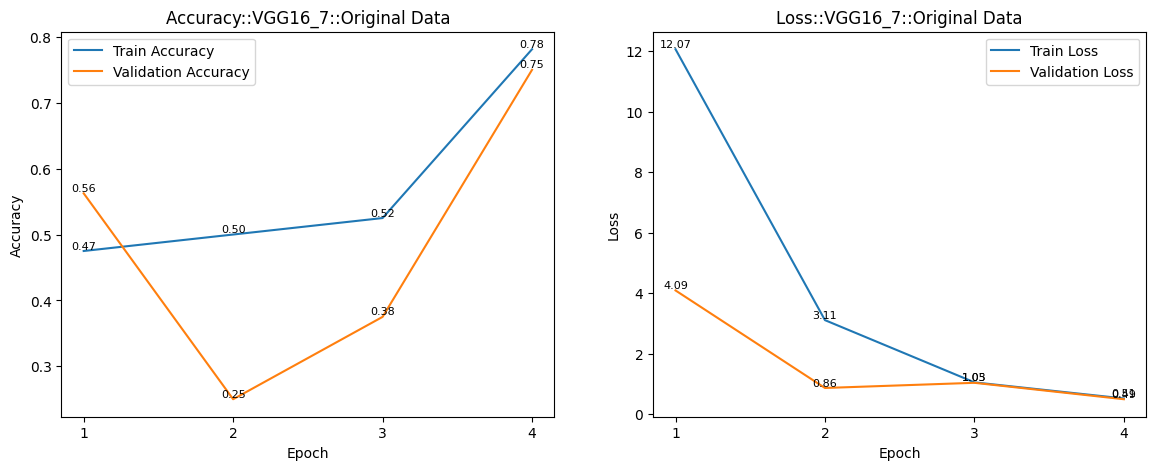

Confusion matrix, without normalization
[[  6 194]
 [  0 200]]


<Figure size 640x480 with 0 Axes>

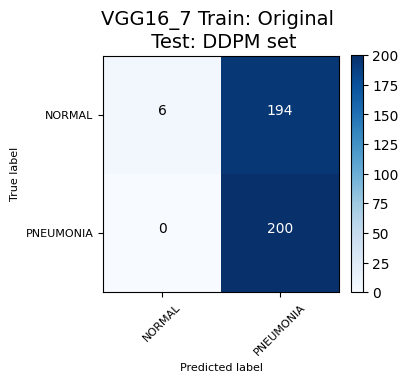

              precision    recall  f1-score   support

      NORMAL       1.00      0.03      0.06       200
   PNEUMONIA       0.51      1.00      0.67       200

    accuracy                           0.52       400
   macro avg       0.75      0.52      0.37       400
weighted avg       0.75      0.52      0.37       400

Binary Classification:
Accuracy: 0.515
Recall: 1.0
F1 Score: 0.6734006734006734
Confusion matrix, without normalization
[[ 35  65]
 [  0 100]]


<Figure size 640x480 with 0 Axes>

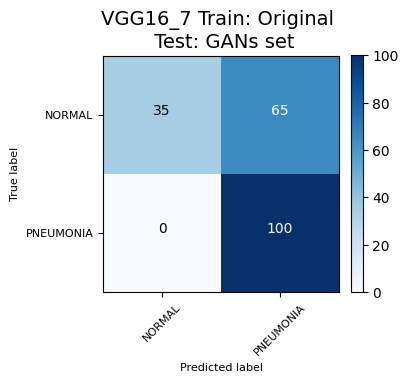

              precision    recall  f1-score   support

      NORMAL       1.00      0.35      0.52       100
   PNEUMONIA       0.61      1.00      0.75       100

    accuracy                           0.68       200
   macro avg       0.80      0.68      0.64       200
weighted avg       0.80      0.68      0.64       200

Binary Classification:
Accuracy: 0.675
Recall: 1.0
F1 Score: 0.7547169811320755
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6377 - loss: 3.0941 - val_accuracy: 0.8438 - val_loss: 0.7942
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 806ms/step - accuracy: 0.8428 - loss: 0.5232 - val_accuracy: 1.0000 - val_loss: 7.0628e-04
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 932ms/step - accuracy: 0.9302 - loss: 0.2695 - val_accuracy: 0.9688 - val_loss: 0.0936
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 807ms/step - accuracy: 0.9812 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss: 0.0177


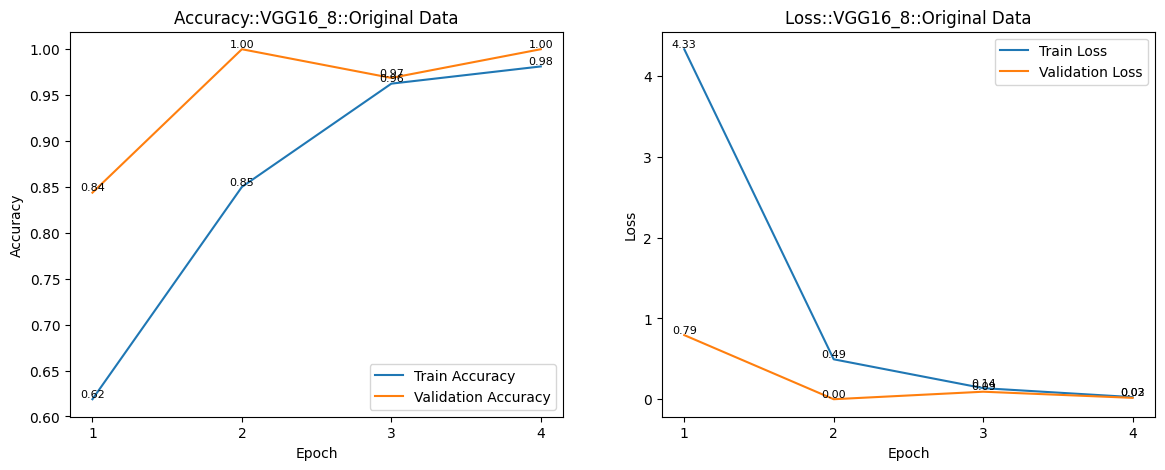

Confusion matrix, without normalization
[[178  22]
 [  4 196]]


<Figure size 640x480 with 0 Axes>

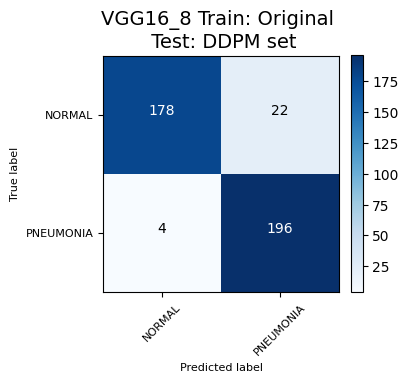

              precision    recall  f1-score   support

      NORMAL       0.98      0.89      0.93       200
   PNEUMONIA       0.90      0.98      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.93       400

Binary Classification:
Accuracy: 0.935
Recall: 0.98
F1 Score: 0.937799043062201
Confusion matrix, without normalization
[[100   0]
 [  0 100]]


<Figure size 640x480 with 0 Axes>

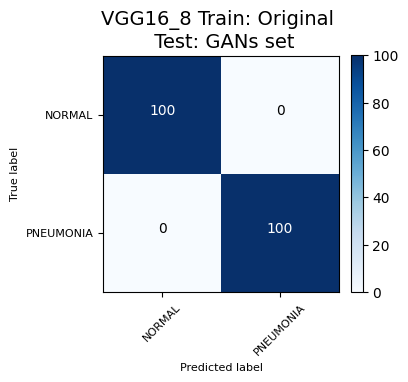

              precision    recall  f1-score   support

      NORMAL       1.00      1.00      1.00       100
   PNEUMONIA       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Binary Classification:
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5461 - loss: 7.8157 - val_accuracy: 0.4375 - val_loss: 10.6775
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.5615 - loss: 5.9035 - val_accuracy: 0.7500 - val_loss: 1.2225
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 943ms/step - accuracy: 0.4957 - loss: 2.5282 - val_accuracy: 0.8750 - val_loss: 0.2638
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.8286 - loss: 0.4399 - val_accuracy: 0.7500 - val_loss: 0.5146


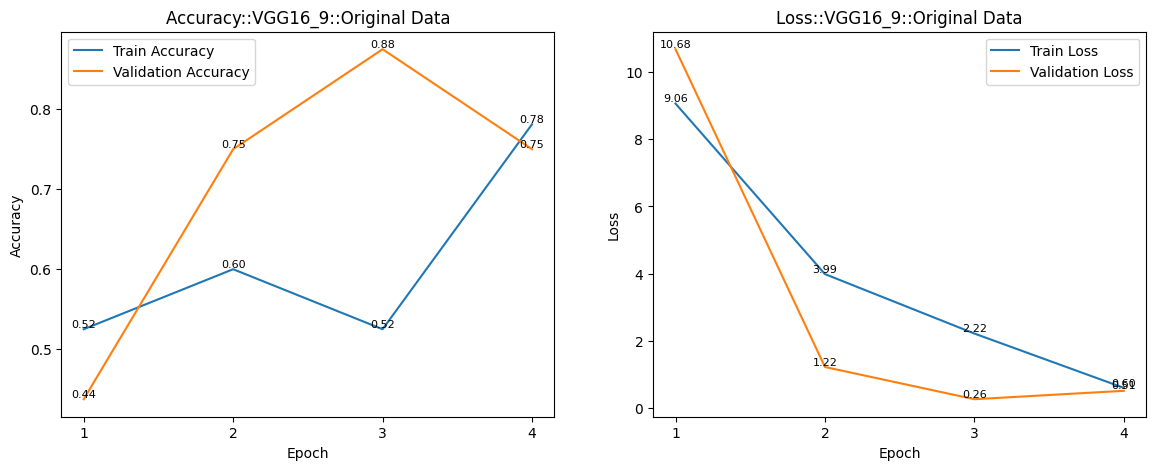

Confusion matrix, without normalization
[[200   0]
 [ 93 107]]


<Figure size 640x480 with 0 Axes>

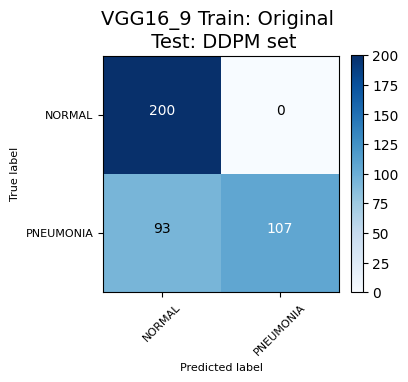

              precision    recall  f1-score   support

      NORMAL       0.68      1.00      0.81       200
   PNEUMONIA       1.00      0.54      0.70       200

    accuracy                           0.77       400
   macro avg       0.84      0.77      0.75       400
weighted avg       0.84      0.77      0.75       400

Binary Classification:
Accuracy: 0.7675
Recall: 0.535
F1 Score: 0.6970684039087948
Confusion matrix, without normalization
[[100   0]
 [ 63  37]]


<Figure size 640x480 with 0 Axes>

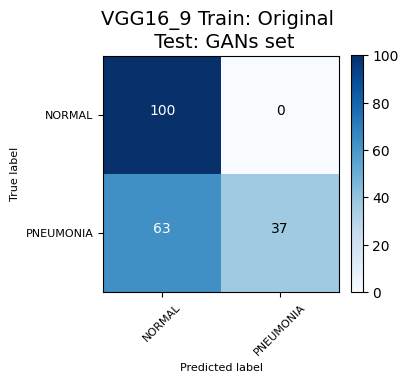

              precision    recall  f1-score   support

      NORMAL       0.61      1.00      0.76       100
   PNEUMONIA       1.00      0.37      0.54       100

    accuracy                           0.69       200
   macro avg       0.81      0.69      0.65       200
weighted avg       0.81      0.69      0.65       200

Binary Classification:
Accuracy: 0.685
Recall: 0.37
F1 Score: 0.5401459854014599
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6072 - loss: 4.6850 - val_accuracy: 0.5938 - val_loss: 3.1887
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 819ms/step - accuracy: 0.7674 - loss: 1.5254 - val_accuracy: 1.0000 - val_loss: 9.3405e-04
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 942ms/step - accuracy: 0.8656 - loss: 0.5805 - val_accuracy: 0.9688 - val_loss: 0.2411
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 815ms/step - accuracy: 0.9814 - loss: 0.0664 - val_accuracy: 1.0000 - val_loss: 0.0181


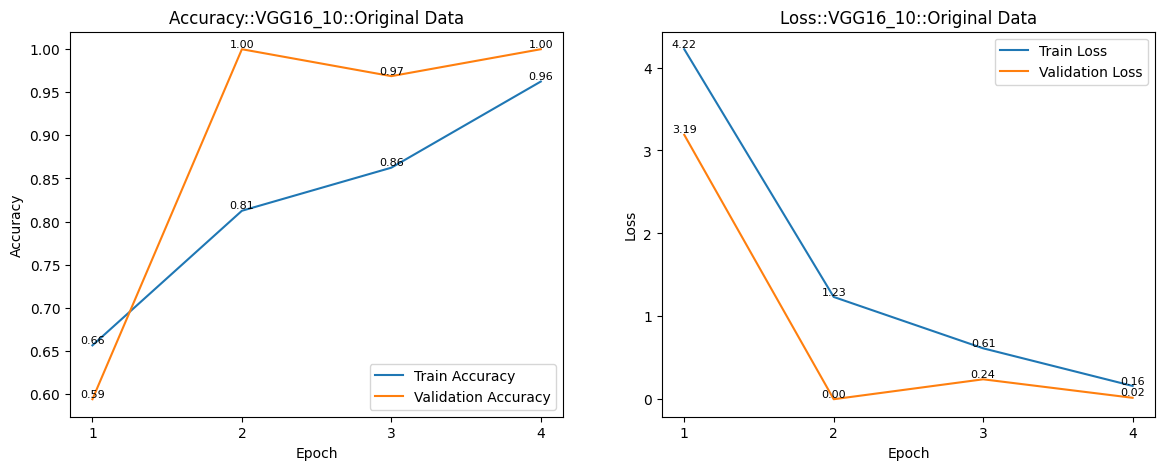

Confusion matrix, without normalization
[[200   0]
 [ 44 156]]


<Figure size 640x480 with 0 Axes>

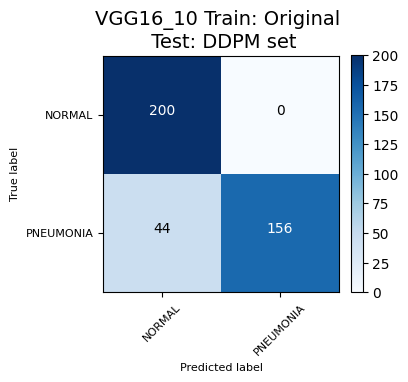

              precision    recall  f1-score   support

      NORMAL       0.82      1.00      0.90       200
   PNEUMONIA       1.00      0.78      0.88       200

    accuracy                           0.89       400
   macro avg       0.91      0.89      0.89       400
weighted avg       0.91      0.89      0.89       400

Binary Classification:
Accuracy: 0.89
Recall: 0.78
F1 Score: 0.8764044943820225
Confusion matrix, without normalization
[[100   0]
 [ 16  84]]


<Figure size 640x480 with 0 Axes>

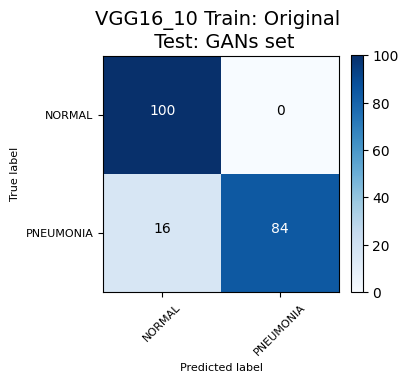

              precision    recall  f1-score   support

      NORMAL       0.86      1.00      0.93       100
   PNEUMONIA       1.00      0.84      0.91       100

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200

Binary Classification:
Accuracy: 0.92
Recall: 0.84
F1 Score: 0.9130434782608695
Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4844 - loss: 11.0966 - val_accuracy: 0.5625 - val_loss: 4.0382
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 824ms/step - accuracy: 0.5256 - loss: 2.8565 - val_accuracy: 0.5000 - val_loss: 1.0376
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 952ms/step - accuracy: 0.8136 - loss: 0.9038 - val_accuracy: 0.7188 - val_loss: 1.0035
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 813ms/step - accuracy: 0.8151 - loss: 0.4658 - val_accuracy: 1.0000 - val_loss: 0.0554


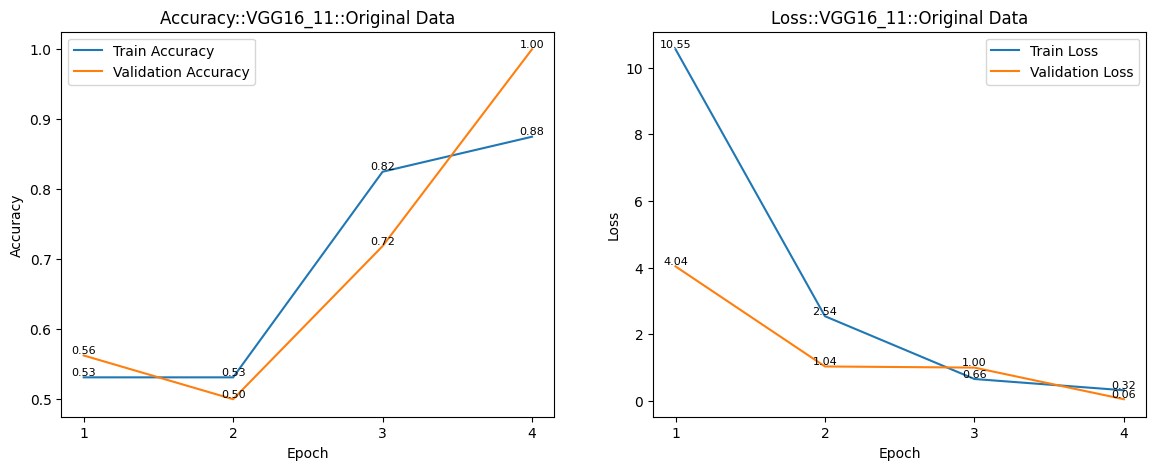

Confusion matrix, without normalization
[[194   6]
 [ 23 177]]


<Figure size 640x480 with 0 Axes>

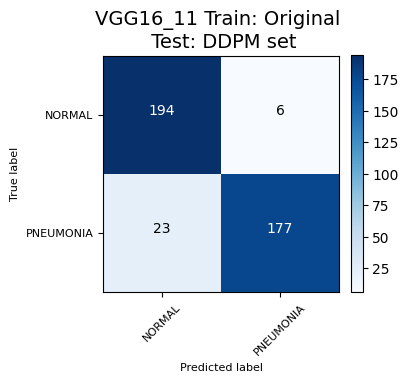

              precision    recall  f1-score   support

      NORMAL       0.89      0.97      0.93       200
   PNEUMONIA       0.97      0.89      0.92       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Binary Classification:
Accuracy: 0.9275
Recall: 0.885
F1 Score: 0.9242819843342036
Confusion matrix, without normalization
[[100   0]
 [ 17  83]]


<Figure size 640x480 with 0 Axes>

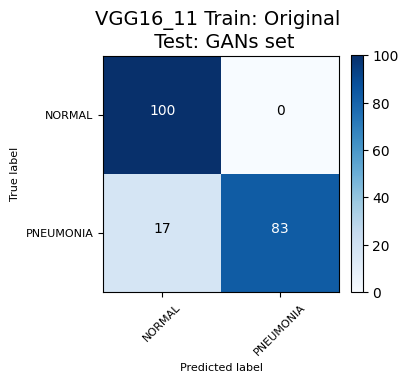

              precision    recall  f1-score   support

      NORMAL       0.85      1.00      0.92       100
   PNEUMONIA       1.00      0.83      0.91       100

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.91       200
weighted avg       0.93      0.92      0.91       200

Binary Classification:
Accuracy: 0.915
Recall: 0.83
F1 Score: 0.907103825136612


In [4]:

for i in range(12):
    train_gen, val_gen, X_train, X_val, batch_size = prepare_train_val_data(dataset_dir, class_labels)
    steps_per_epoch = len(X_train) // batch_size
    validation_steps = len(X_val) // batch_size
    model_2class = VGG_imagenet((224, 224, 3), num_classes=2)
    history_2class = model_2class.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_gen,
        validation_steps=validation_steps,
        epochs=4
    )

    #### Plot Acuuracy and Loss
    title= "Original Data"
    model_name= f"VGG16_{i}"
    plot_training_history(history_2class, title, model_name,figsize=(14, 5))

    dataset_dir = f'{path_dir}/DataDDPM/Generated'
    title = f"VGG16_{i} Train: Original \n Test: DDPM set"
    evaluate_test_set(dataset_dir, model_2class, batch_size, data_generator, plot_confusion_matrix, class_labels, title)

    dataset_dir = f'{path_dir}/DataGANS/Generated'
    title = f"VGG16_{i} Train: Original \n Test: GANs set"

    evaluate_test_set(dataset_dir, model_2class, batch_size, data_generator, plot_confusion_matrix, class_labels, title)

# CNN Classification

In [2]:
class_labels = ['NORMAL', 'PNEUMONIA']
img_size = 128
batch_size = 32
def split_dataset(ds, train_ratio=0.8, val_ratio=0.2, shuffle=True):
    # Get dataset size
    dataset_size = len(ds)

    # Calculate split sizes
    train_size = int(train_ratio * dataset_size)
    val_size = int(val_ratio * dataset_size)

    # Shuffle dataset if required
    if shuffle:
        ds = ds.shuffle(dataset_size)

    # Split dataset
    train_dataset = ds.take(train_size)
    val_dataset = ds.skip(train_size).take(val_size)

    return train_dataset, val_dataset

In [3]:
import os
import tensorflow as tf

def load_and_filter_images(directory, class_labels, img_size=(128, 128)):
    images = []
    labels = []
    label_map = {class_name: index for index, class_name in enumerate(class_labels)}

    for class_name in class_labels:
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img)
            labels.append(label_map[class_name])

    images = np.array(images)
    labels = np.array(labels)
    
    return tf.data.Dataset.from_tensor_slices((images, labels))

## Train: Original Data

2024-04-17 10:52:01.328055: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


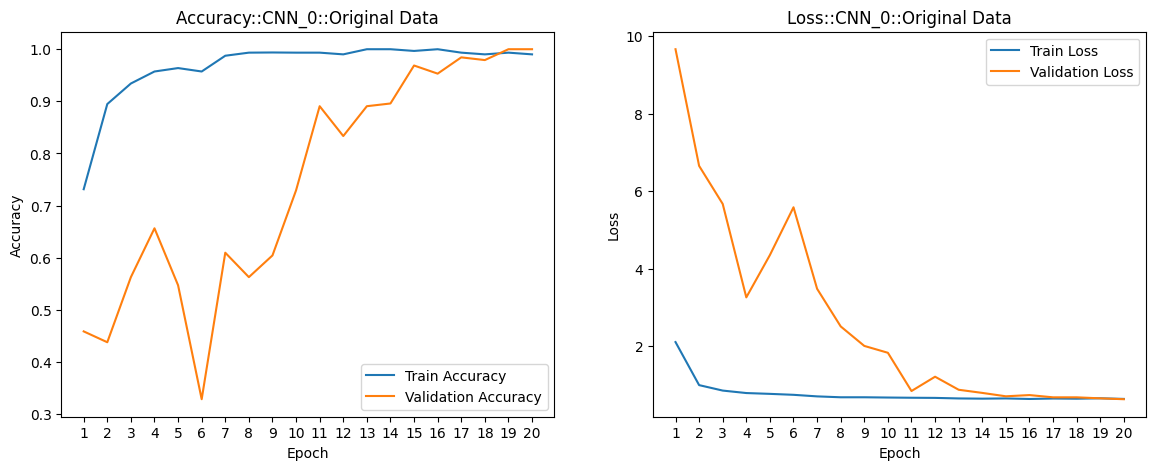

2024-04-17 10:53:40.322898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[140  60]
 [  0 200]]
              precision    recall  f1-score   support

      NORMAL       1.00      0.70      0.82       200
   PNEUMONIA       0.77      1.00      0.87       200

    accuracy                           0.85       400
   macro avg       0.88      0.85      0.85       400
weighted avg       0.88      0.85      0.85       400

Binary Classification:
Accuracy: 0.85
Recall: 1.0
F1 Score: 0.8695652173913043


2024-04-17 10:53:42.833721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[14 86]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.82      0.14      0.24       100
   PNEUMONIA       0.53      0.97      0.69       100

    accuracy                           0.56       200
   macro avg       0.68      0.55      0.46       200
weighted avg       0.68      0.56      0.46       200

Binary Classification:
Accuracy: 0.555
Recall: 0.97
F1 Score: 0.6855123674911661
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


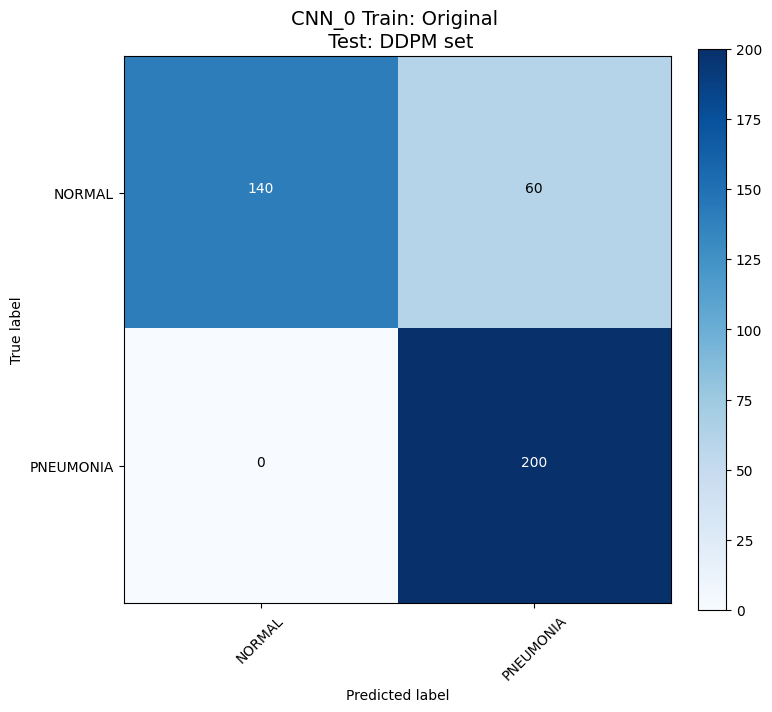

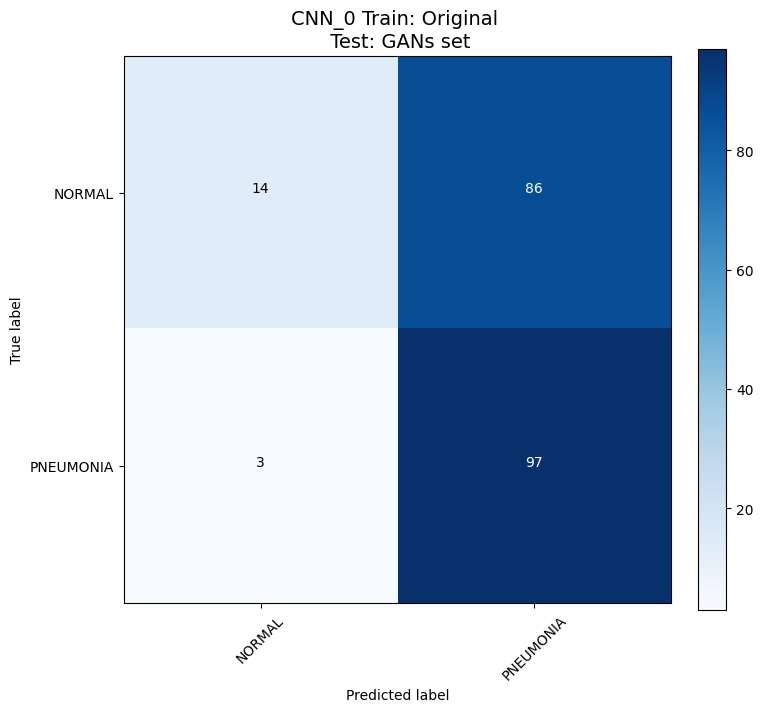

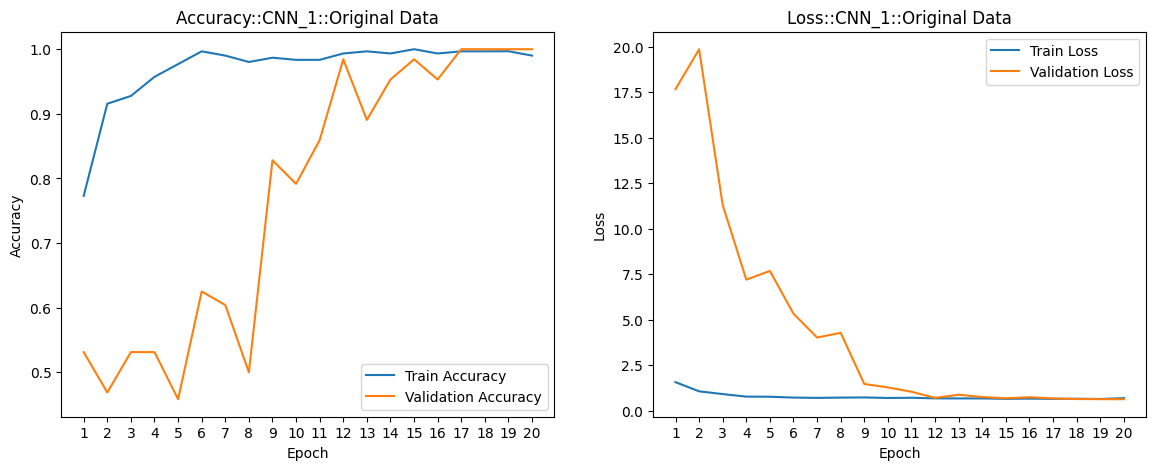

2024-04-17 10:55:21.763821: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[146  54]
 [  0 200]]
              precision    recall  f1-score   support

      NORMAL       1.00      0.73      0.84       200
   PNEUMONIA       0.79      1.00      0.88       200

    accuracy                           0.86       400
   macro avg       0.89      0.86      0.86       400
weighted avg       0.89      0.86      0.86       400

Binary Classification:
Accuracy: 0.865
Recall: 1.0
F1 Score: 0.8810572687224669


2024-04-17 10:55:23.407786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[14 86]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.82      0.14      0.24       100
   PNEUMONIA       0.53      0.97      0.69       100

    accuracy                           0.56       200
   macro avg       0.68      0.55      0.46       200
weighted avg       0.68      0.56      0.46       200

Binary Classification:
Accuracy: 0.555
Recall: 0.97
F1 Score: 0.6855123674911661
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


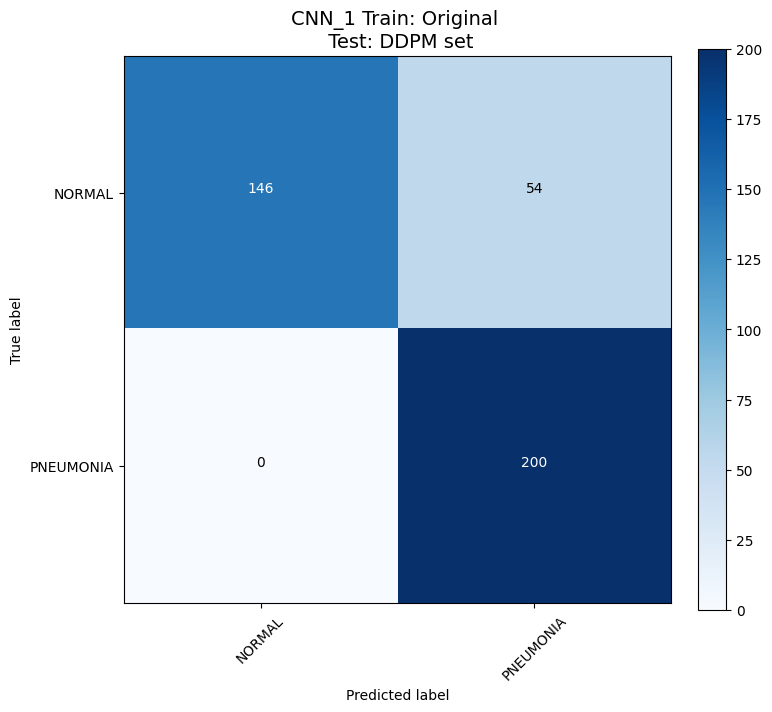

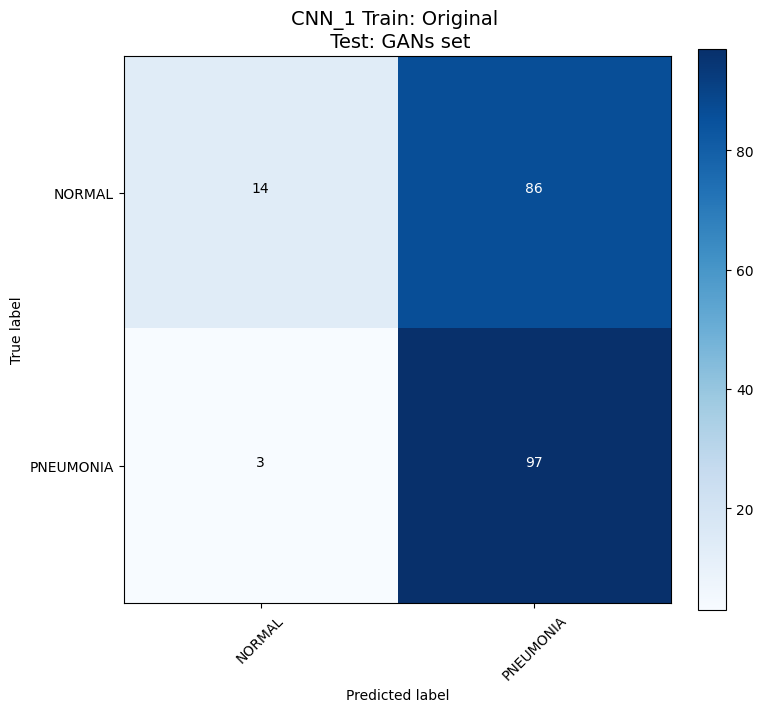

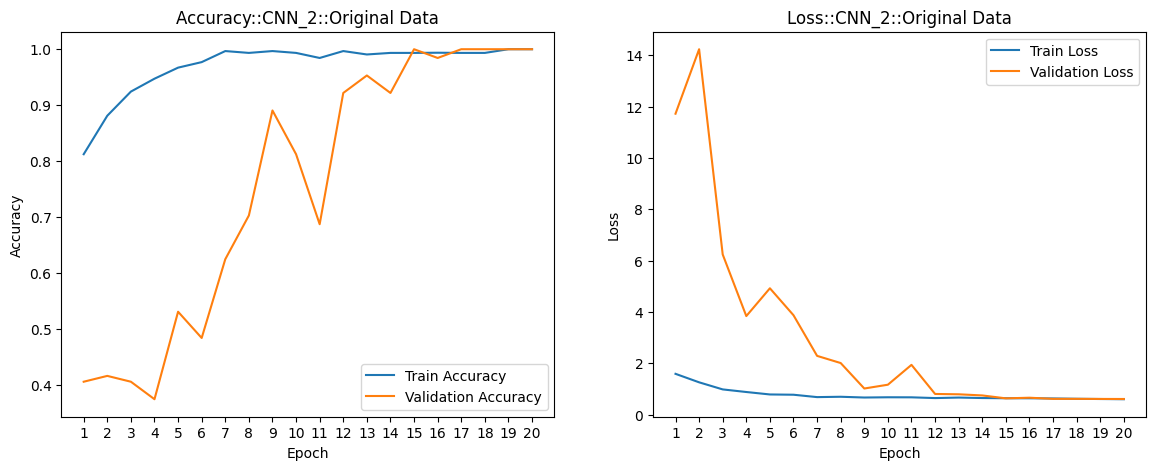

2024-04-17 10:57:02.844648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[158  42]
 [  0 200]]
              precision    recall  f1-score   support

      NORMAL       1.00      0.79      0.88       200
   PNEUMONIA       0.83      1.00      0.90       200

    accuracy                           0.90       400
   macro avg       0.91      0.90      0.89       400
weighted avg       0.91      0.90      0.89       400

Binary Classification:
Accuracy: 0.895
Recall: 1.0
F1 Score: 0.9049773755656109


2024-04-17 10:57:04.548836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[15 85]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.83      0.15      0.25       100
   PNEUMONIA       0.53      0.97      0.69       100

    accuracy                           0.56       200
   macro avg       0.68      0.56      0.47       200
weighted avg       0.68      0.56      0.47       200

Binary Classification:
Accuracy: 0.56
Recall: 0.97
F1 Score: 0.6879432624113475
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


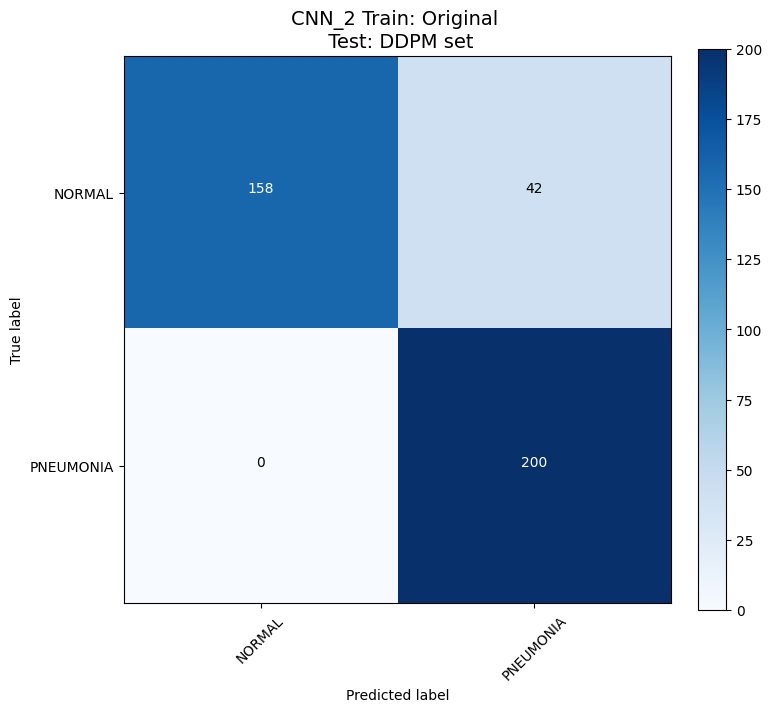

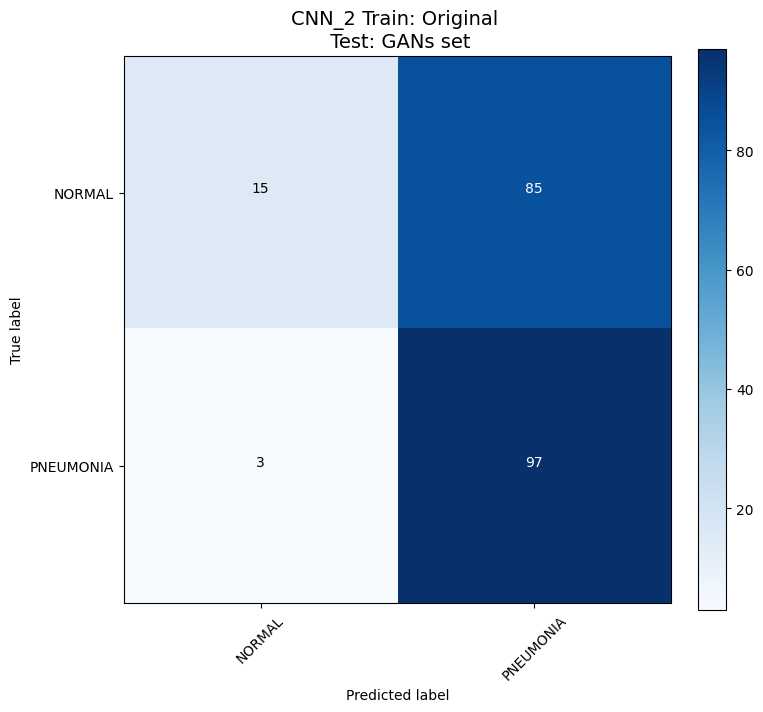

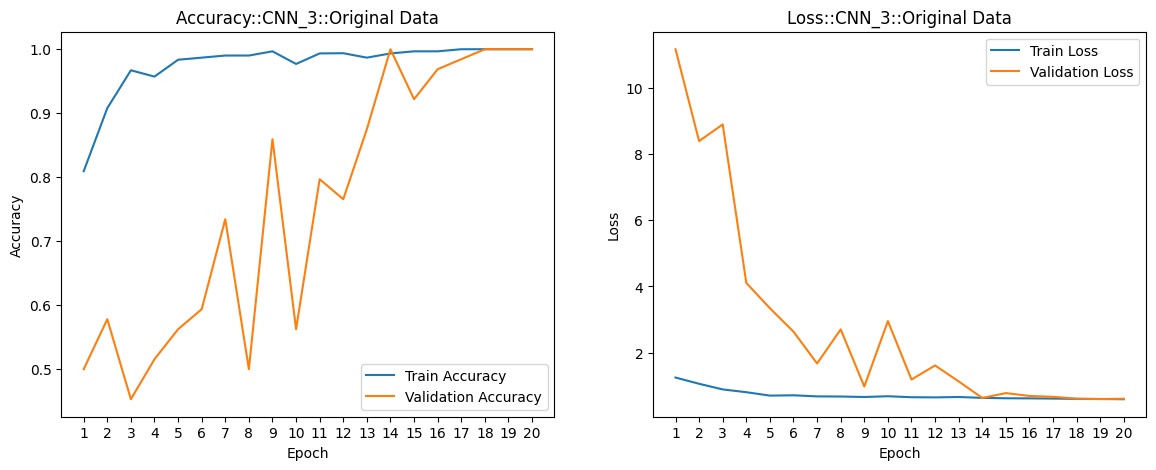

2024-04-17 10:58:43.081802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[150  50]
 [  2 198]]
              precision    recall  f1-score   support

      NORMAL       0.99      0.75      0.85       200
   PNEUMONIA       0.80      0.99      0.88       200

    accuracy                           0.87       400
   macro avg       0.89      0.87      0.87       400
weighted avg       0.89      0.87      0.87       400

Binary Classification:
Accuracy: 0.87
Recall: 0.99
F1 Score: 0.8839285714285714


2024-04-17 10:58:44.891671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[25 75]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.89      0.25      0.39       100
   PNEUMONIA       0.56      0.97      0.71       100

    accuracy                           0.61       200
   macro avg       0.73      0.61      0.55       200
weighted avg       0.73      0.61      0.55       200

Binary Classification:
Accuracy: 0.61
Recall: 0.97
F1 Score: 0.7132352941176471
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


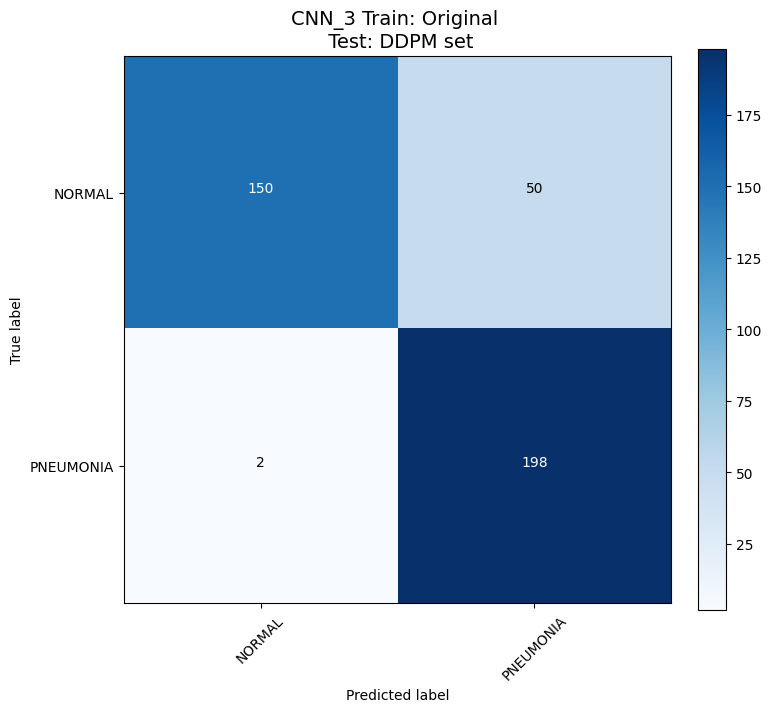

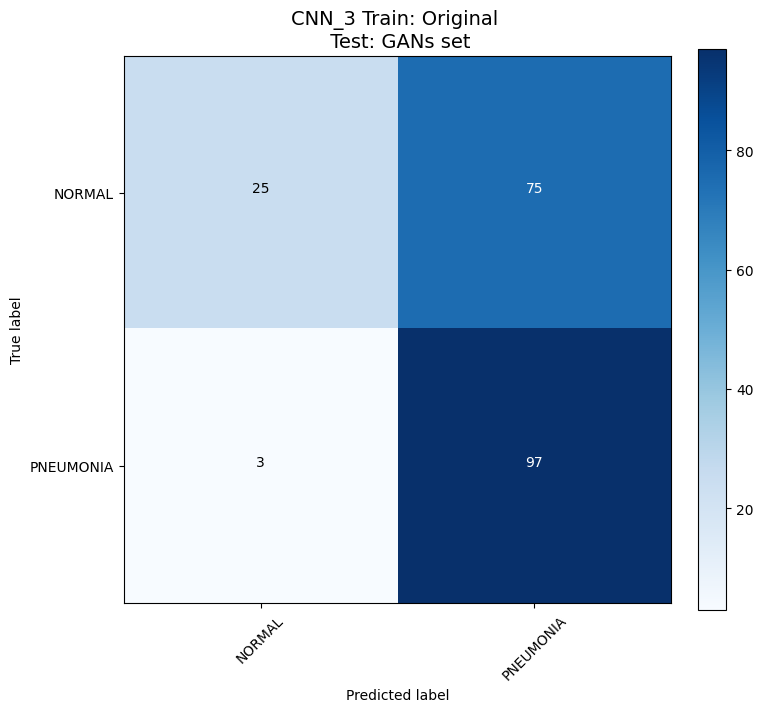

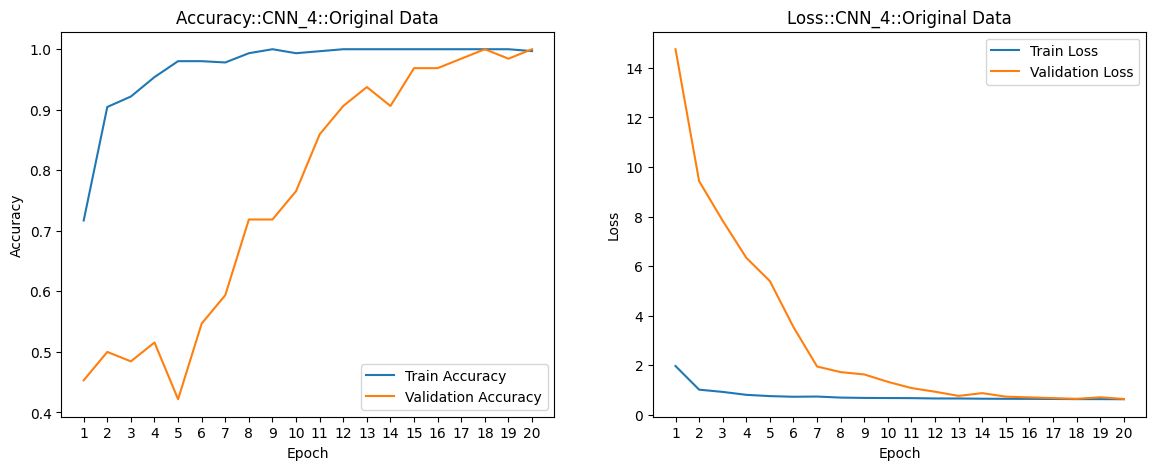

2024-04-17 11:00:24.650699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[124  76]
 [  0 200]]
              precision    recall  f1-score   support

      NORMAL       1.00      0.62      0.77       200
   PNEUMONIA       0.72      1.00      0.84       200

    accuracy                           0.81       400
   macro avg       0.86      0.81      0.80       400
weighted avg       0.86      0.81      0.80       400

Binary Classification:
Accuracy: 0.81
Recall: 1.0
F1 Score: 0.8403361344537815


2024-04-17 11:00:26.389203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[13 87]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.81      0.13      0.22       100
   PNEUMONIA       0.53      0.97      0.68       100

    accuracy                           0.55       200
   macro avg       0.67      0.55      0.45       200
weighted avg       0.67      0.55      0.45       200

Binary Classification:
Accuracy: 0.55
Recall: 0.97
F1 Score: 0.6830985915492958
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


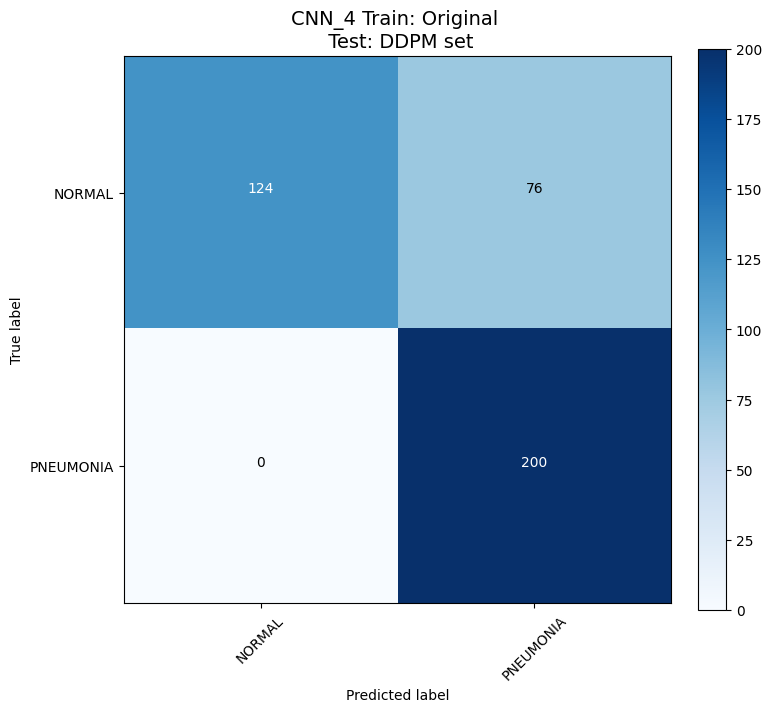

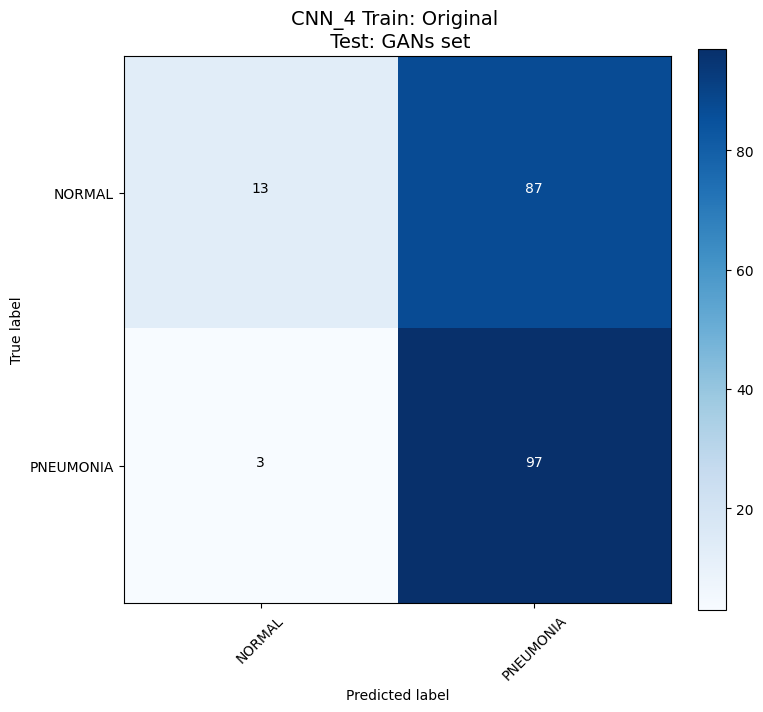

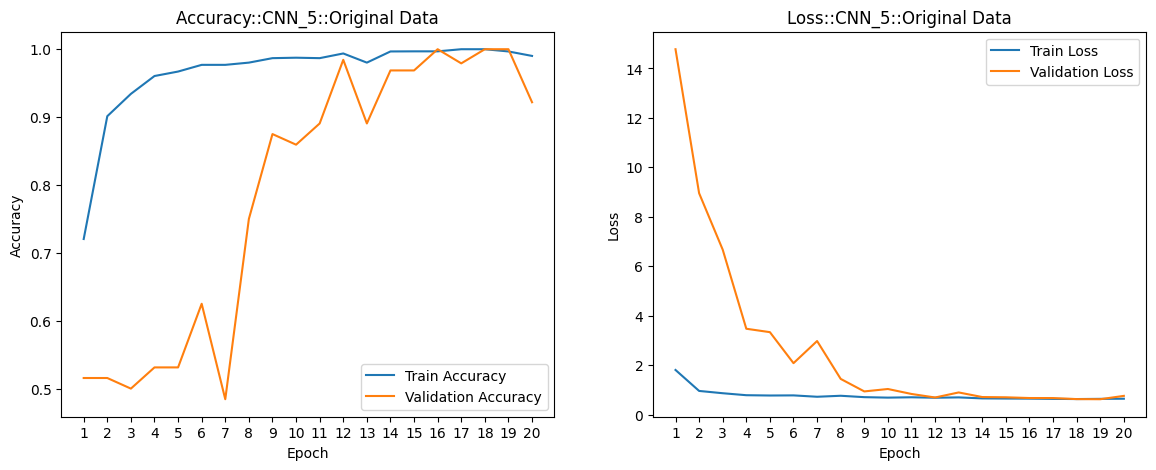

2024-04-17 11:02:05.477869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[192   8]
 [ 33 167]]
              precision    recall  f1-score   support

      NORMAL       0.85      0.96      0.90       200
   PNEUMONIA       0.95      0.83      0.89       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Binary Classification:
Accuracy: 0.8975
Recall: 0.835
F1 Score: 0.8906666666666667


2024-04-17 11:02:07.274109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[31 69]
 [10 90]]
              precision    recall  f1-score   support

      NORMAL       0.76      0.31      0.44       100
   PNEUMONIA       0.57      0.90      0.69       100

    accuracy                           0.60       200
   macro avg       0.66      0.60      0.57       200
weighted avg       0.66      0.60      0.57       200

Binary Classification:
Accuracy: 0.605
Recall: 0.9
F1 Score: 0.694980694980695
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


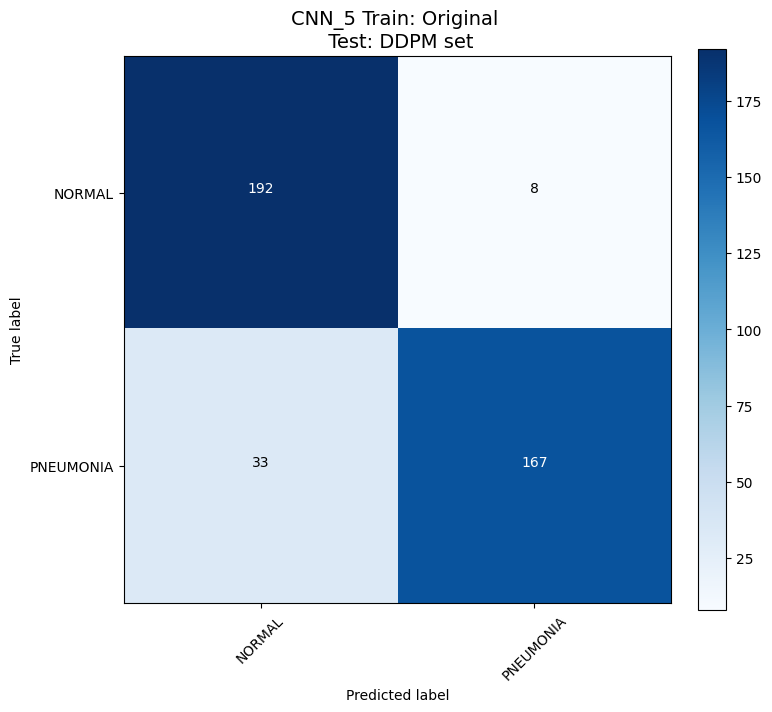

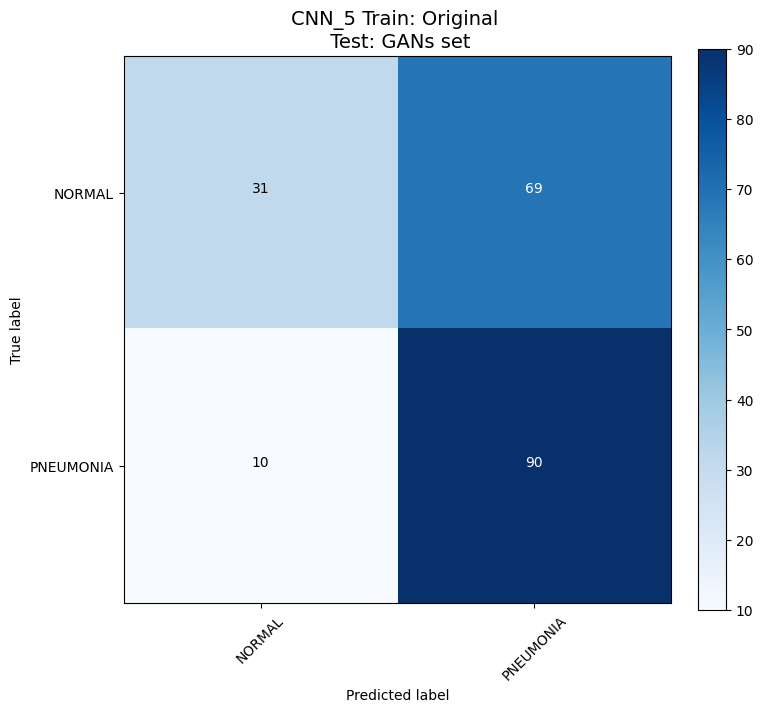

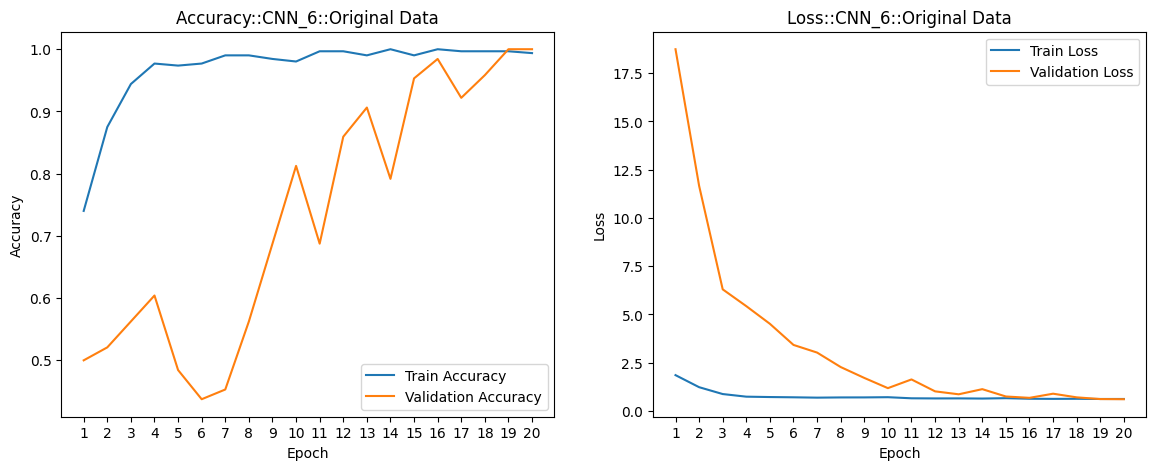

2024-04-17 11:03:46.226261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[168  32]
 [  1 199]]
              precision    recall  f1-score   support

      NORMAL       0.99      0.84      0.91       200
   PNEUMONIA       0.86      0.99      0.92       200

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

Binary Classification:
Accuracy: 0.9175
Recall: 0.995
F1 Score: 0.9234338747099768


2024-04-17 11:03:47.909329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[19 81]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.86      0.19      0.31       100
   PNEUMONIA       0.54      0.97      0.70       100

    accuracy                           0.58       200
   macro avg       0.70      0.58      0.50       200
weighted avg       0.70      0.58      0.50       200

Binary Classification:
Accuracy: 0.58
Recall: 0.97
F1 Score: 0.697841726618705
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


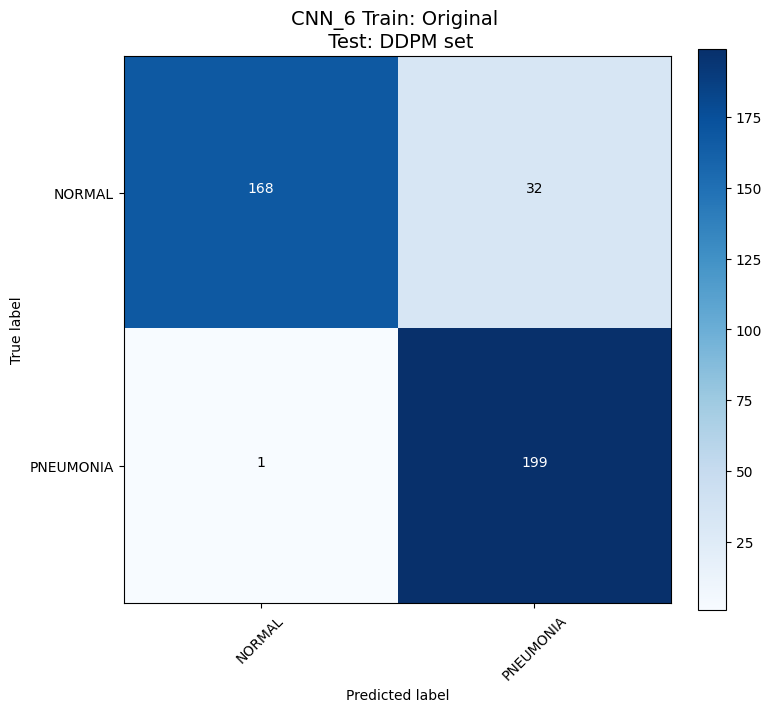

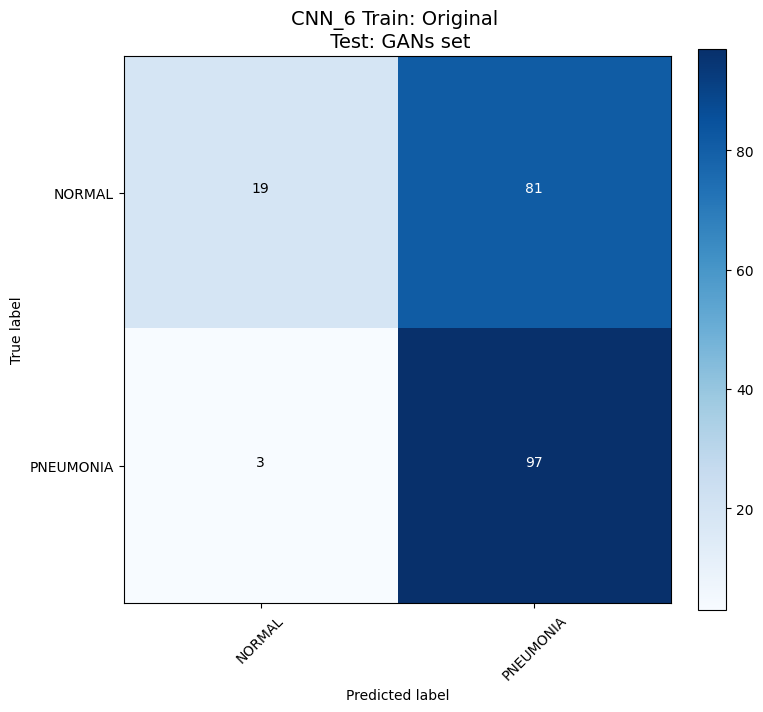

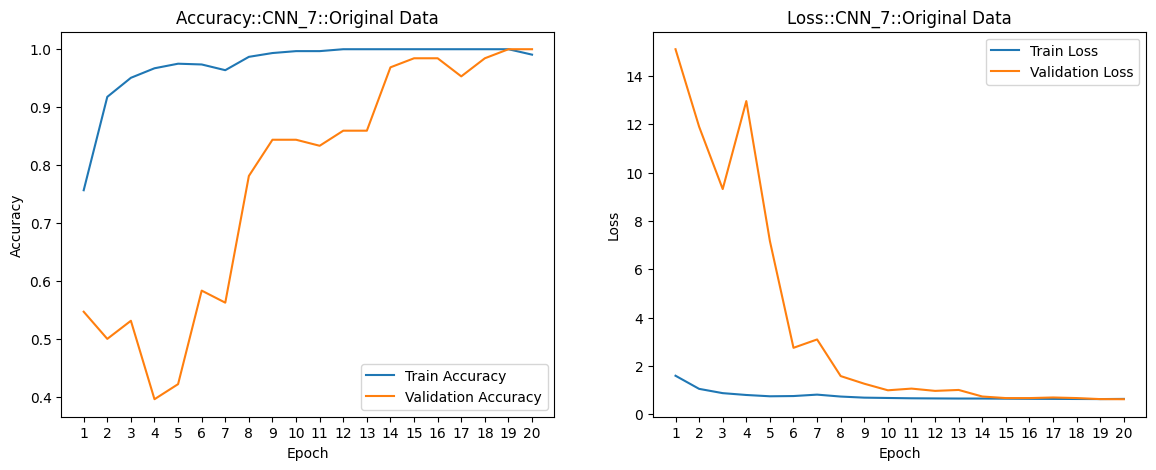

2024-04-17 11:05:27.224904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[150  50]
 [  3 197]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.75      0.85       200
   PNEUMONIA       0.80      0.98      0.88       200

    accuracy                           0.87       400
   macro avg       0.89      0.87      0.87       400
weighted avg       0.89      0.87      0.87       400

Binary Classification:
Accuracy: 0.8675
Recall: 0.985
F1 Score: 0.8814317673378076


2024-04-17 11:05:28.936411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[22 78]
 [ 4 96]]
              precision    recall  f1-score   support

      NORMAL       0.85      0.22      0.35       100
   PNEUMONIA       0.55      0.96      0.70       100

    accuracy                           0.59       200
   macro avg       0.70      0.59      0.52       200
weighted avg       0.70      0.59      0.52       200

Binary Classification:
Accuracy: 0.59
Recall: 0.96
F1 Score: 0.7007299270072993
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


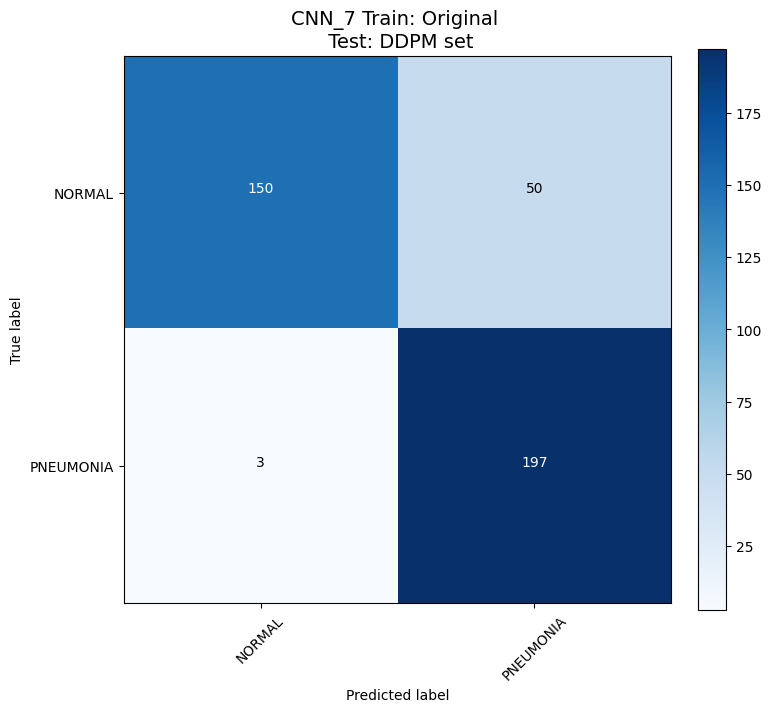

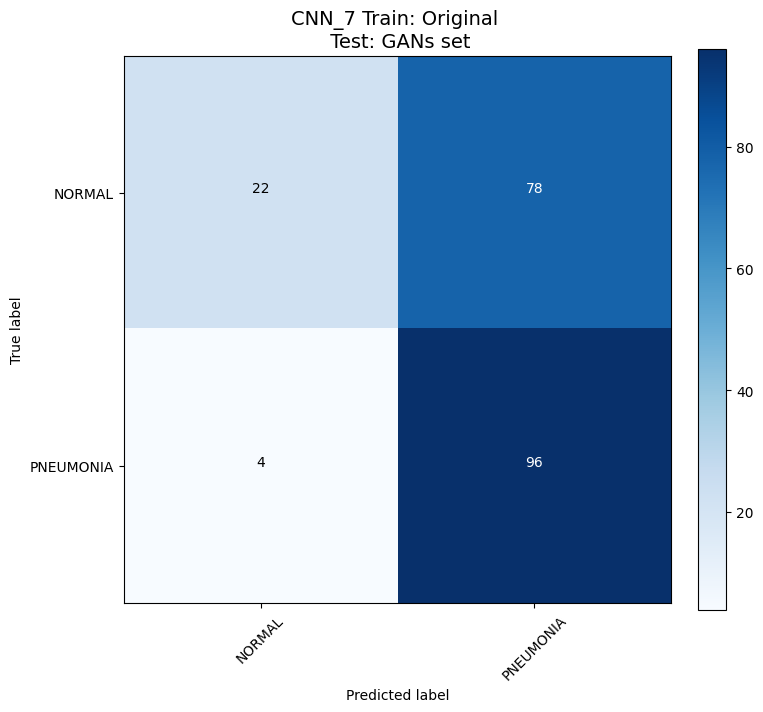

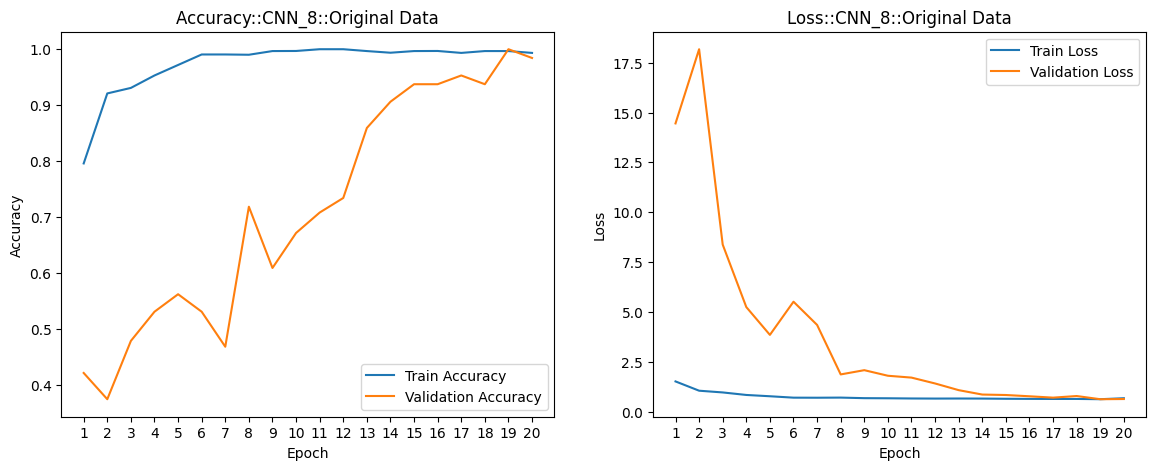

2024-04-17 11:07:08.753577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[190  10]
 [  3 197]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.95      0.97       200
   PNEUMONIA       0.95      0.98      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Binary Classification:
Accuracy: 0.9675
Recall: 0.985
F1 Score: 0.9680589680589681


2024-04-17 11:07:10.413741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[34 66]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.92      0.34      0.50       100
   PNEUMONIA       0.60      0.97      0.74       100

    accuracy                           0.66       200
   macro avg       0.76      0.66      0.62       200
weighted avg       0.76      0.66      0.62       200

Binary Classification:
Accuracy: 0.655
Recall: 0.97
F1 Score: 0.7376425855513308
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


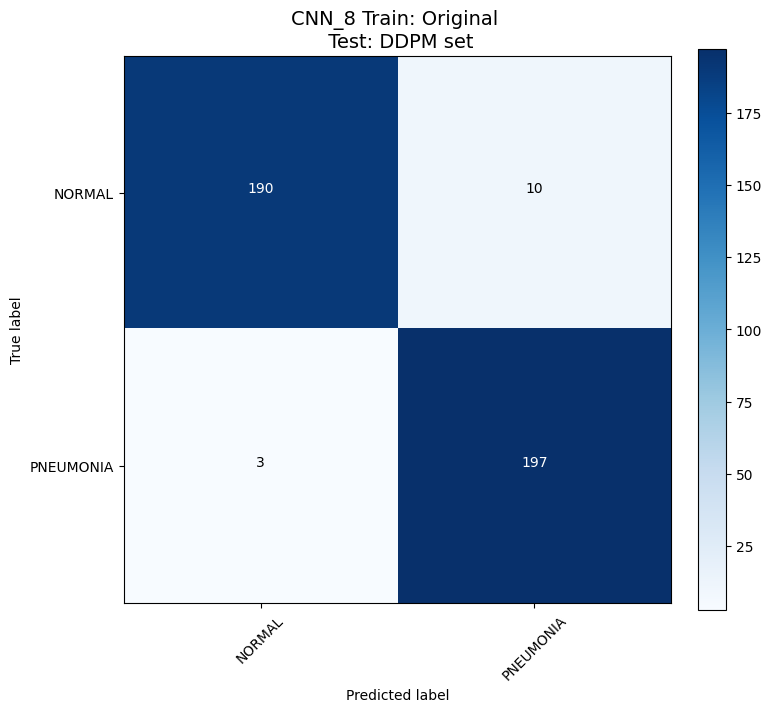

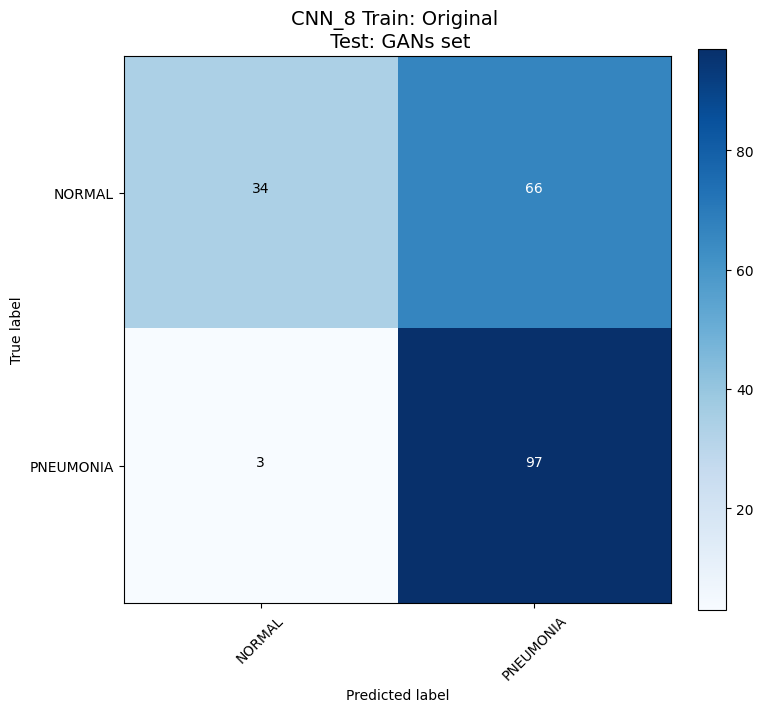

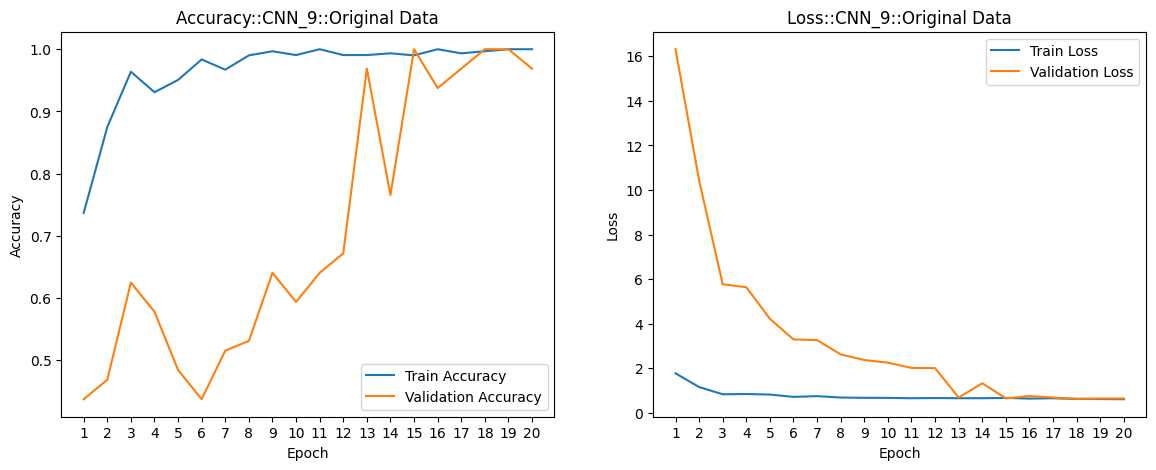

2024-04-17 11:08:49.802824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[166  34]
 [  2 198]]
              precision    recall  f1-score   support

      NORMAL       0.99      0.83      0.90       200
   PNEUMONIA       0.85      0.99      0.92       200

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400

Binary Classification:
Accuracy: 0.91
Recall: 0.99
F1 Score: 0.9166666666666666


2024-04-17 11:08:51.546529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[19 81]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.86      0.19      0.31       100
   PNEUMONIA       0.54      0.97      0.70       100

    accuracy                           0.58       200
   macro avg       0.70      0.58      0.50       200
weighted avg       0.70      0.58      0.50       200

Binary Classification:
Accuracy: 0.58
Recall: 0.97
F1 Score: 0.697841726618705
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


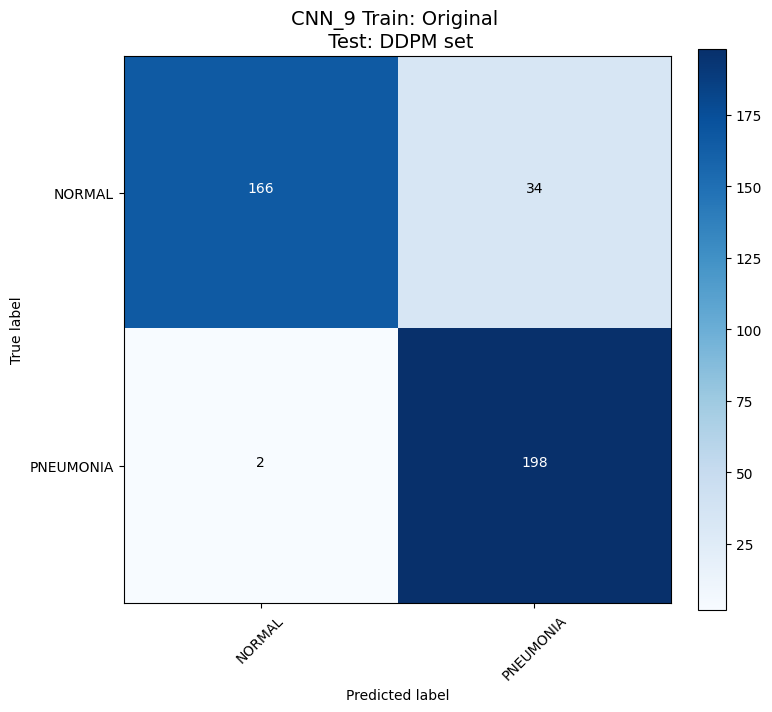

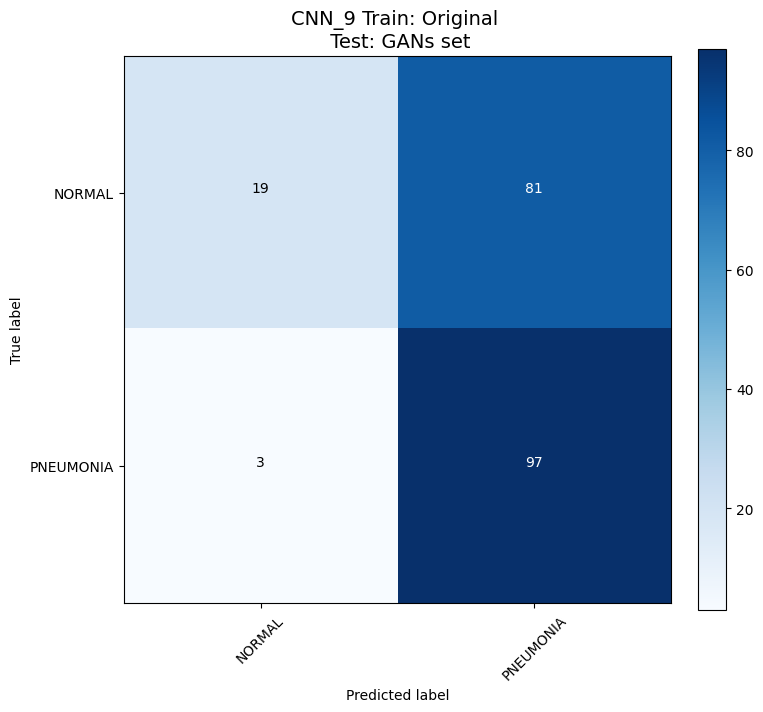

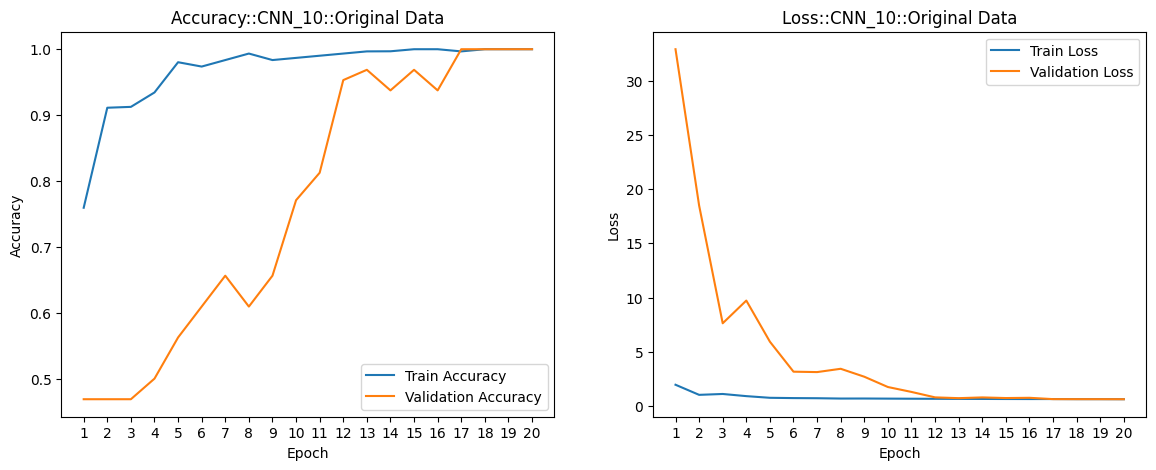

2024-04-17 11:10:31.983502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[150  50]
 [  0 200]]
              precision    recall  f1-score   support

      NORMAL       1.00      0.75      0.86       200
   PNEUMONIA       0.80      1.00      0.89       200

    accuracy                           0.88       400
   macro avg       0.90      0.88      0.87       400
weighted avg       0.90      0.88      0.87       400

Binary Classification:
Accuracy: 0.875
Recall: 1.0
F1 Score: 0.8888888888888888


2024-04-17 11:10:33.719364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[13 87]
 [ 3 97]]
              precision    recall  f1-score   support

      NORMAL       0.81      0.13      0.22       100
   PNEUMONIA       0.53      0.97      0.68       100

    accuracy                           0.55       200
   macro avg       0.67      0.55      0.45       200
weighted avg       0.67      0.55      0.45       200

Binary Classification:
Accuracy: 0.55
Recall: 0.97
F1 Score: 0.6830985915492958
****************** Next ******************


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


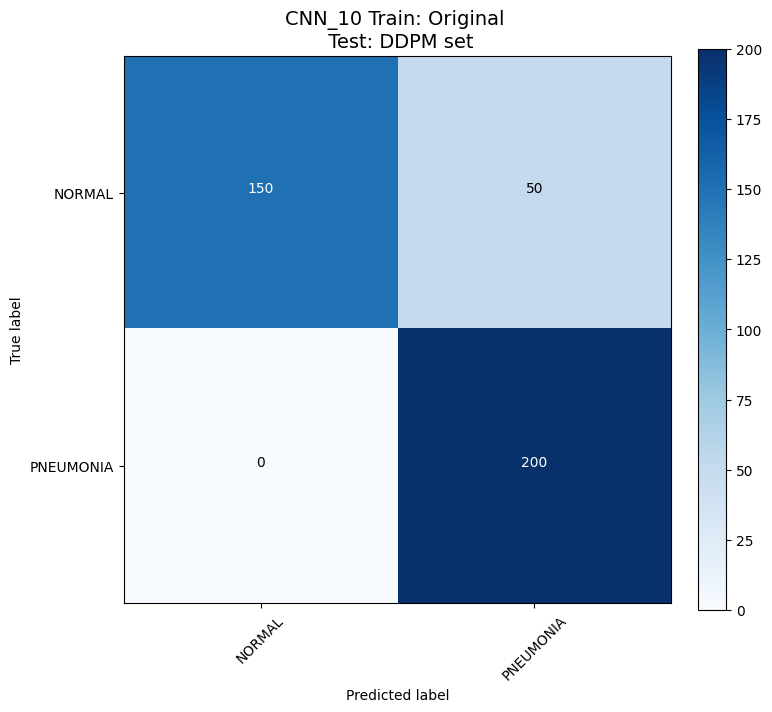

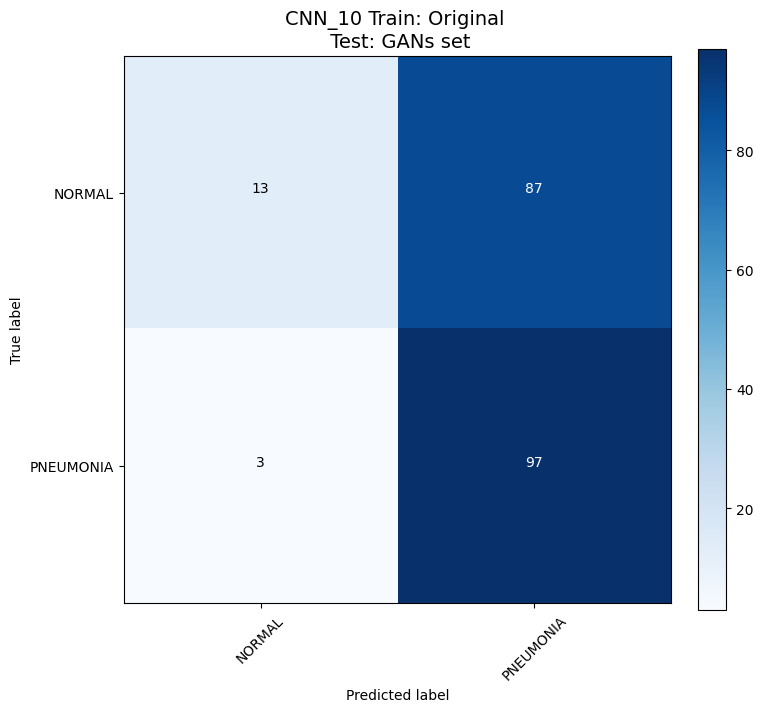

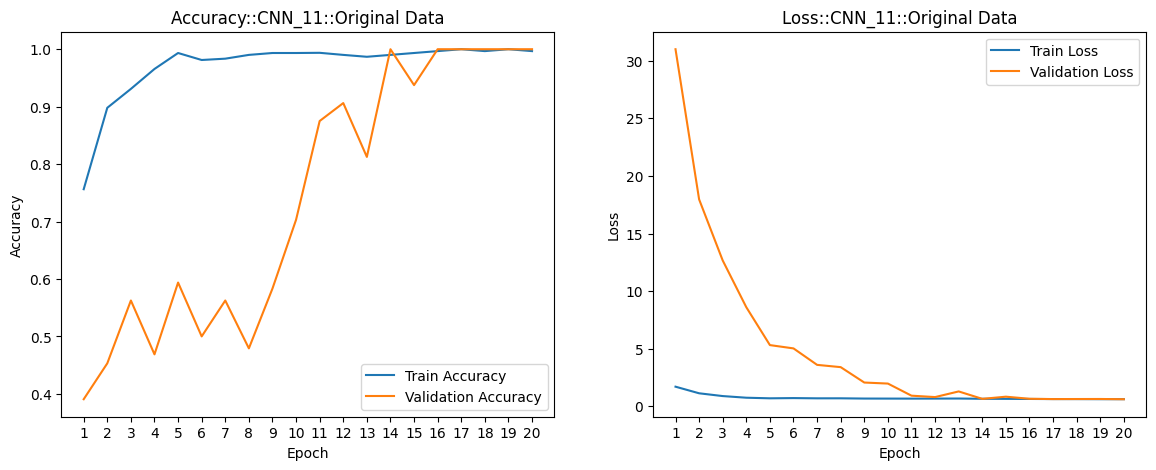

2024-04-17 11:12:12.683725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[188  12]
 [ 27 173]]
              precision    recall  f1-score   support

      NORMAL       0.87      0.94      0.91       200
   PNEUMONIA       0.94      0.86      0.90       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Binary Classification:
Accuracy: 0.9025
Recall: 0.865
F1 Score: 0.8987012987012987


2024-04-17 11:12:14.321241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix, without normalization
[[37 63]
 [12 88]]
              precision    recall  f1-score   support

      NORMAL       0.76      0.37      0.50       100
   PNEUMONIA       0.58      0.88      0.70       100

    accuracy                           0.62       200
   macro avg       0.67      0.62      0.60       200
weighted avg       0.67      0.62      0.60       200

Binary Classification:
Accuracy: 0.625
Recall: 0.88
F1 Score: 0.701195219123506
****************** Next ******************


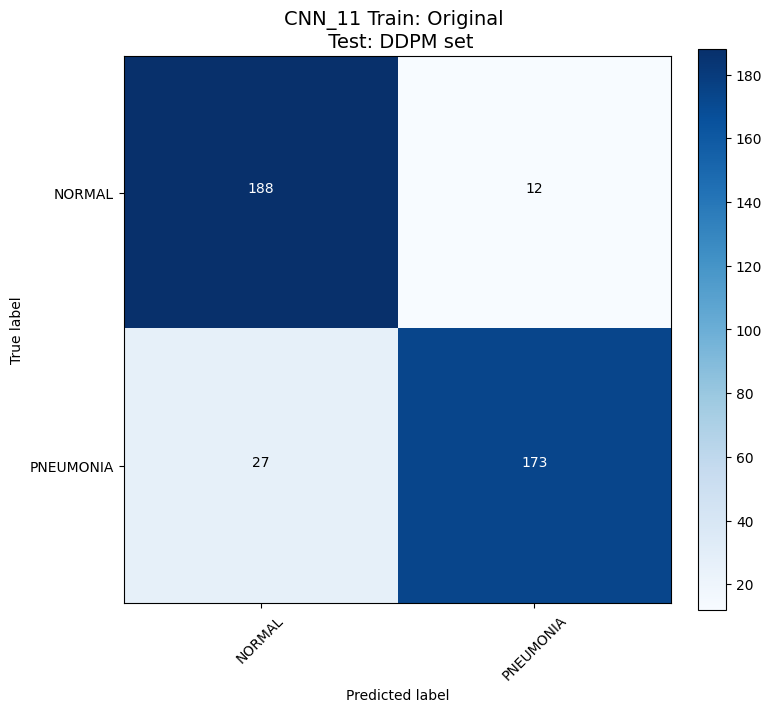

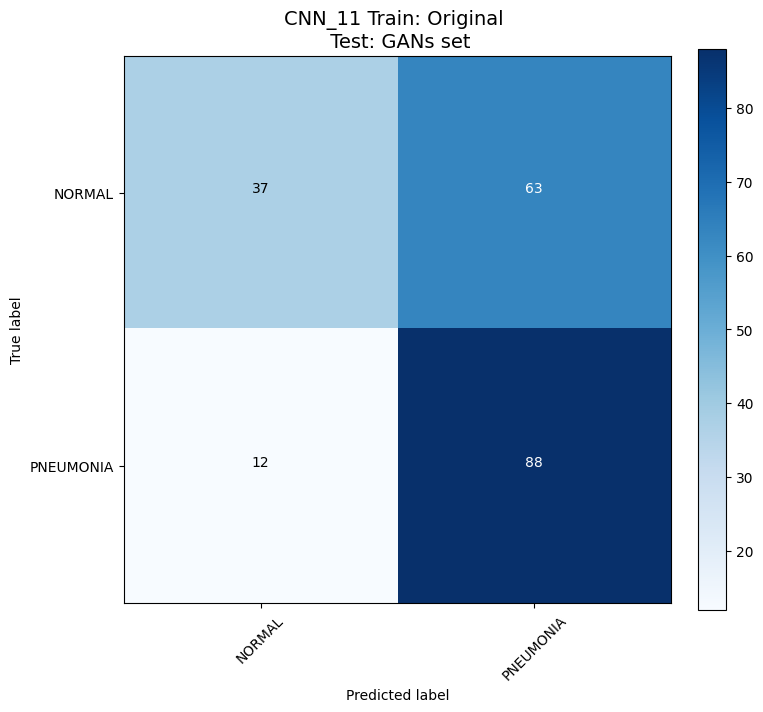

In [4]:
for i in range(12):
    img_size = 128
    batch_size = 32
    image_dir = f'{path_dir}/DataDDPM/Original'
    class_labels = ['NORMAL', 'PNEUMONIA']
    classes = class_labels
    dataset = load_and_filter_images(image_dir, class_labels, img_size=(128, 128))

    dataset = dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    train_ds, val_ds = split_dataset(dataset)

    model = Sequential([
        Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.1),
        Dense(2, activation='softmax')  # Changed to 2 for the two classes
    ])

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model3 = model
    # model3.summary()
    history3 = model3.fit(train_ds, epochs = 20, batch_size = 32, verbose = 0, validation_data = val_ds)
    title = "Original Data"

    model_name = f"CNN_{i}"
    plot_training_history2(history3, title, model_name, figsize=(14, 5))

    ddpm_dir = f'{path_dir}/DataDDPM/Generated'

    dataset_ddpm = load_and_filter_images(ddpm_dir, class_labels, img_size=(128, 128))

    # Now you can batch, shuffle, and prefetch as needed
    dataset_ddpm = dataset_ddpm.shuffle(buffer_size=1024).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    ddpm_ds = dataset_ddpm.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    true_labels = np.array([])
    pred_labels = np.array([])

    for images, labels in ddpm_ds:
        preds = model3.predict(images, verbose=0)
        true_labels = np.concatenate([true_labels, labels.numpy()])
        pred_labels = np.concatenate([pred_labels, np.argmax(preds, axis=1)])
        
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    cm = confusion_matrix(true_labels, pred_labels)

    plot_confusion_matrix(cm, classes,
                        title=f'CNN_{i} Train: Original \n Test: DDPM set',
                        figsize=(8, 8),  # Adjust the figure size as needed
                        title_fontsize=14,
                        tick_labelsize=10,
                        colorbar_size={'shrink': 0.75, 'aspect': 20, 'pad': 0.04})
    print(classification_report(true_labels, pred_labels, target_names=class_labels))
    binary_accuracy = accuracy_score(true_labels, pred_labels)
    binary_recall = recall_score(true_labels, pred_labels)
    binary_f1 = f1_score(true_labels, pred_labels)

    print("Binary Classification:")
    print(f"Accuracy: {binary_accuracy}")
    print(f"Recall: {binary_recall}")
    print(f"F1 Score: {binary_f1}")
    

    gans_dir = f'{path_dir}/DataGANS/Generated'

    dataset_gans = load_and_filter_images(gans_dir, class_labels, img_size=(128, 128))

    # Now you can batch, shuffle, and prefetch as needed
    dataset_gans = dataset_gans.shuffle(buffer_size=1024).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    gans_ds = dataset_gans.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    true_labels = np.array([])
    pred_labels = np.array([])

    for images, labels in gans_ds:
        preds = model3.predict(images, verbose=0)
        true_labels = np.concatenate([true_labels, labels.numpy()])
        pred_labels = np.concatenate([pred_labels, np.argmax(preds, axis=1)])
        
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    cm = confusion_matrix(true_labels, pred_labels)

    plot_confusion_matrix(cm, classes,
                        title=f'CNN_{i} Train: Original \n Test: GANs set',
                        figsize=(8, 8),  # Adjust the figure size as needed
                        title_fontsize=14,
                        tick_labelsize=10,
                        colorbar_size={'shrink': 0.75, 'aspect': 20, 'pad': 0.04})
    
    print(classification_report(true_labels, pred_labels, target_names=class_labels))
    
    binary_accuracy = accuracy_score(true_labels, pred_labels)
    binary_recall = recall_score(true_labels, pred_labels)
    binary_f1 = f1_score(true_labels, pred_labels)

    print("Binary Classification:")
    print(f"Accuracy: {binary_accuracy}")
    print(f"Recall: {binary_recall}")
    print(f"F1 Score: {binary_f1}")
    print('****************** Next ******************')